# `Sales Data Analysis and Cleaning on Order Level`

## Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import gdown

import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8-pastel')

In [2]:
data=pd.read_csv(r"C:\Users\Rano's PC\Machine\github_repo_cloned\Elevvo_Internship\Task-9\order level data.csv")

In [3]:
pd.set_option('display.max_columns',None)

In [4]:
data.head()

,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,price,seller_id,freight_value,payment_sequential,payment_type,payment_installments,payment_value,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1.0,87285b34884572647811a353c7ac498a,29.99,3504c0cb71d7fa48d967e0e4c94d59d9,8.72,2.0,voucher,1.0,38.71,4.0,500.0,19.0,8.0,13.0,9350.0,maua,SP,housewares
1,53cdb2fc8bc7dce0b6741e2150273451,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,1.0,595fac2a385ac33a80bd5114aec74eb8,118.70,289cdb325fb7e7f891c38608bf9e0962,22.76,1.0,boleto,1.0,141.46,1.0,400.0,19.0,13.0,19.0,31570.0,belo horizonte,SP,perfumery
2,47770eb9100c2d0c44946d9cf07ec65d,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,1.0,aa4383b373c6aca5d8797843e5594415,159.90,4869f7a5dfa277a7dca6462dcf3b52b2,19.22,1.0,credit_card,3.0,179.12,1.0,420.0,24.0,19.0,21.0,14840.0,guariba,SP,auto
3,949d5b44dbf5de918fe9c16f97b45f8a,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,45.00,66922902710d126a0e7d26b0e3805106,27.20,1.0,credit_card,1.0,72.20,3.0,450.0,30.0,10.0,20.0,31842.0,belo horizonte,MG,pet_shop
4,ad21c59c0840e6cb83a9ceb5573f8159,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,1.0,65266b2da20d04dbe00c5c2d3bb7859e,19.90,2c9e548be18521d1c43cde1c582c6de8,8.72,1.0,credit_card,1.0,28.62,4.0,250.0,51.0,15.0,15.0,8752.0,mogi das cruzes,SP,stationery


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_id                       99441 non-null  object 
 1   order_status                   99441 non-null  object 
 2   order_purchase_timestamp       99441 non-null  object 
 3   order_approved_at              99281 non-null  object 
 4   order_delivered_carrier_date   97658 non-null  object 
 5   order_delivered_customer_date  96476 non-null  object 
 6   order_estimated_delivery_date  99441 non-null  object 
 7   customer_unique_id             99441 non-null  object 
 8   customer_zip_code_prefix       99441 non-null  int64  
 9   customer_city                  99441 non-null  object 
 10  customer_state                 99441 non-null  object 
 11  order_item_id                  98666 non-null  float64
 12  product_id                     98666 non-null 

In [6]:
data.isnull().sum()

order_id                            0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
order_item_id                     775
product_id                        775
price                             775
seller_id                         775
freight_value                     775
payment_sequential                  1
payment_type                        1
payment_installments                1
payment_value                       1
product_photos_qty               2193
product_weight_g                  791
product_length_cm                 791
product_height_cm                 791
product_width_cm                  791
seller_zip_code_prefix            775
seller_city 

In [7]:
data.columns

Index(['order_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'customer_unique_id', 'customer_zip_code_prefix', 'customer_city',
       'customer_state', 'order_item_id', 'product_id', 'price', 'seller_id',
       'freight_value', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'product_photos_qty',
       'product_weight_g', 'product_length_cm', 'product_height_cm',
       'product_width_cm', 'seller_zip_code_prefix', 'seller_city',
       'seller_state', 'product_category_name_english'],
      dtype='object')

## Cleaning of data

In [8]:
data['order_purchase_timestamp']=pd.to_datetime(data['order_purchase_timestamp'])

In [9]:
data['order_approved_at']=pd.to_datetime(data['order_approved_at'])

In [10]:
data['order_delivered_carrier_date']=pd.to_datetime(data['order_delivered_carrier_date'])

In [11]:
data['order_delivered_customer_date']=pd.to_datetime(data['order_delivered_customer_date'])

In [12]:
data['order_estimated_delivery_date']=pd.to_datetime(data['order_estimated_delivery_date'])

In [13]:
data.rename(columns={'order_status':'status','order_purchase_timestamp':'purchase_date','order_approved_at':'approve_date','order_delivered_carrier_date':'delivered_carrier_date',
                     'order_delivered_customer_date':'delivered_customer_date','order_estimated_delivery_date':'estimated_delivery_date','customer_unique_id':'customer_id',
                     'customer_zip_code_prefix':'customer_zip','seller_zip_code_prefix':'seller_zip','product_category_name_english':'product_category'},inplace=True)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   order_id                 99441 non-null  object        
 1   status                   99441 non-null  object        
 2   purchase_date            99441 non-null  datetime64[ns]
 3   approve_date             99281 non-null  datetime64[ns]
 4   delivered_carrier_date   97658 non-null  datetime64[ns]
 5   delivered_customer_date  96476 non-null  datetime64[ns]
 6   estimated_delivery_date  99441 non-null  datetime64[ns]
 7   customer_id              99441 non-null  object        
 8   customer_zip             99441 non-null  int64         
 9   customer_city            99441 non-null  object        
 10  customer_state           99441 non-null  object        
 11  order_item_id            98666 non-null  float64       
 12  product_id               98666 n

In [15]:
data.columns

Index(['order_id', 'status', 'purchase_date', 'approve_date',
       'delivered_carrier_date', 'delivered_customer_date',
       'estimated_delivery_date', 'customer_id', 'customer_zip',
       'customer_city', 'customer_state', 'order_item_id', 'product_id',
       'price', 'seller_id', 'freight_value', 'payment_sequential',
       'payment_type', 'payment_installments', 'payment_value',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm', 'seller_zip', 'seller_city',
       'seller_state', 'product_category'],
      dtype='object')

In [16]:
cols=['customer_zip','order_item_id','payment_sequential','payment_installments','seller_zip']
data[cols]=data[cols].astype(str)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   order_id                 99441 non-null  object        
 1   status                   99441 non-null  object        
 2   purchase_date            99441 non-null  datetime64[ns]
 3   approve_date             99281 non-null  datetime64[ns]
 4   delivered_carrier_date   97658 non-null  datetime64[ns]
 5   delivered_customer_date  96476 non-null  datetime64[ns]
 6   estimated_delivery_date  99441 non-null  datetime64[ns]
 7   customer_id              99441 non-null  object        
 8   customer_zip             99441 non-null  object        
 9   customer_city            99441 non-null  object        
 10  customer_state           99441 non-null  object        
 11  order_item_id            99441 non-null  object        
 12  product_id               98666 n

## Creating features

In [18]:
def hour_classification(hour):
    if 5 <= hour < 8:
        return 'early morning'
    elif 8 <= hour < 12:
        return 'morning'
    elif 12 <= hour < 16:
        return 'afternoon'
    elif 16 <= hour < 20:
        return 'evening'
    elif 20 <= hour < 24:
        return 'night'
    else:  # 0 <= hour < 5
        return 'midnight'


In [19]:
data['purchase_time']=data['purchase_date'].dt.hour.apply(hour_classification)

In [20]:
data['purchase_date']=pd.to_datetime(data['purchase_date'].dt.date)

In [21]:
data['approve_time']=data['approve_date'].dt.hour.apply(hour_classification)

In [22]:
data['approve_date']=pd.to_datetime(data['approve_date'].dt.date)

In [23]:
data['delivered_carrier_time']=data['delivered_carrier_date'].dt.hour.apply(hour_classification)

In [24]:
data['delivered_carrier_date']=pd.to_datetime(data['delivered_carrier_date'].dt.date)

In [25]:
data['delivered_customer_time']=data['delivered_customer_date'].dt.hour.apply(hour_classification)

In [26]:
data['delivered_customer_date']=pd.to_datetime(data['delivered_customer_date'].dt.date)

In [27]:
data.columns

Index(['order_id', 'status', 'purchase_date', 'approve_date',
       'delivered_carrier_date', 'delivered_customer_date',
       'estimated_delivery_date', 'customer_id', 'customer_zip',
       'customer_city', 'customer_state', 'order_item_id', 'product_id',
       'price', 'seller_id', 'freight_value', 'payment_sequential',
       'payment_type', 'payment_installments', 'payment_value',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm', 'seller_zip', 'seller_city',
       'seller_state', 'product_category', 'purchase_time', 'approve_time',
       'delivered_carrier_time', 'delivered_customer_time'],
      dtype='object')

In [28]:
data.drop(columns=['product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm'],inplace=True)

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   order_id                 99441 non-null  object        
 1   status                   99441 non-null  object        
 2   purchase_date            99441 non-null  datetime64[ns]
 3   approve_date             99281 non-null  datetime64[ns]
 4   delivered_carrier_date   97658 non-null  datetime64[ns]
 5   delivered_customer_date  96476 non-null  datetime64[ns]
 6   estimated_delivery_date  99441 non-null  datetime64[ns]
 7   customer_id              99441 non-null  object        
 8   customer_zip             99441 non-null  object        
 9   customer_city            99441 non-null  object        
 10  customer_state           99441 non-null  object        
 11  order_item_id            99441 non-null  object        
 12  product_id               98666 n

## Univariate analysis

### Order ID

**How many uniqe orders are there?**

In [30]:
data['order_id'].nunique()

99441

**Is there any duplicate order?**

In [31]:
data['order_id'].duplicated().sum()

np.int64(0)

### Status

**How many status are there?**

In [32]:
data['status'].nunique()

8

**How many orders are there from each status?**

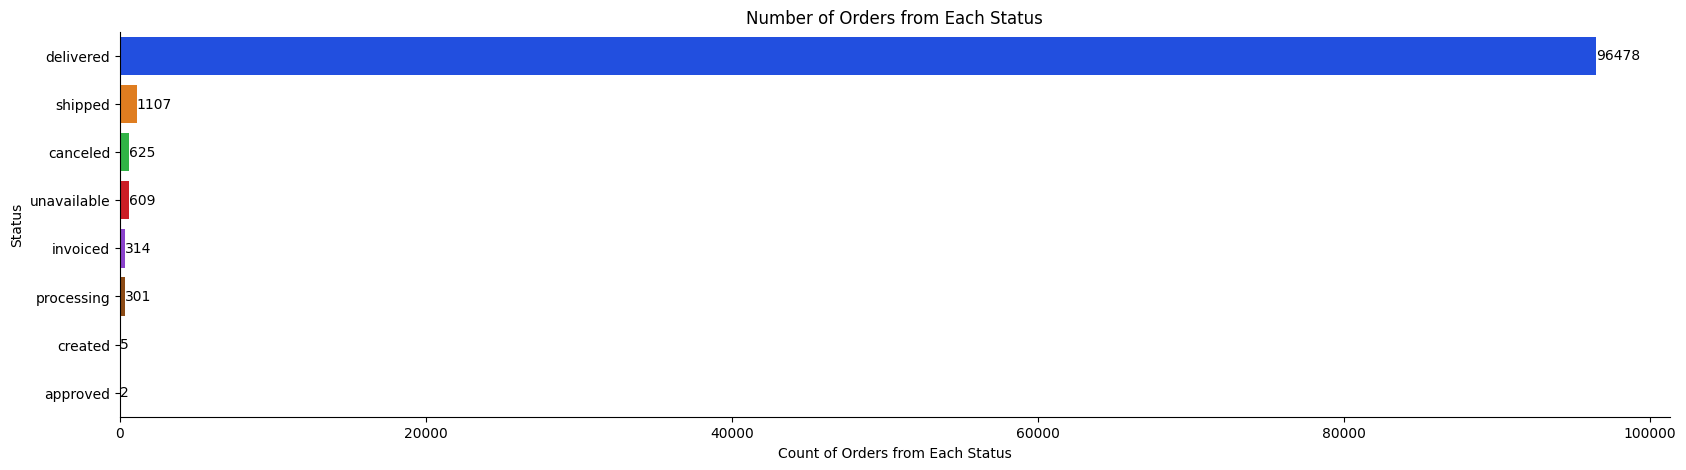

In [33]:
total_status=data['status'].value_counts().reset_index()
plt.figure(figsize=(20,5))
ax=sns.barplot(y='status',x='count',data=total_status,palette='bright')
for container in ax.containers:
    ax.bar_label(container)
plt.grid(0)
plt.ylabel('Status')
plt.xlabel('Count of Orders from Each Status')
plt.title('Number of Orders from Each Status')
sns.despine()
plt.show()

**What are these unavailable status?**

In [34]:
data[data['status']=='unavailable']

,order_id,status,purchase_date,approve_date,delivered_carrier_date,delivered_customer_date,estimated_delivery_date,customer_id,customer_zip,customer_city,customer_state,order_item_id,product_id,price,seller_id,freight_value,payment_sequential,payment_type,payment_installments,payment_value,seller_zip,seller_city,seller_state,product_category,purchase_time,approve_time,delivered_carrier_time,delivered_customer_time
266,8e24261a7e58791d10cb1bf9da94df5c,unavailable,2017-11-16,2017-11-16,NaT,NaT,2017-12-05,41fc647b8c6bd979b1b6364b60471b50,89288,sao bento do sul,SC,nan,NaN,NaN,NaN,NaN,1.0,credit_card,5.0,84.00,nan,NaN,NaN,NaN,afternoon,afternoon,midnight,midnight
586,c272bcd21c287498b4883c7512019702,unavailable,2018-01-31,2018-01-31,NaT,NaT,2018-02-16,0e634b16e4c585acbd7b2e8276ce6677,11701,praia grande,SP,nan,NaN,NaN,NaN,NaN,1.0,credit_card,1.0,97.68,nan,NaN,NaN,NaN,morning,afternoon,midnight,midnight
687,37553832a3a89c9b2db59701c357ca67,unavailable,2017-08-14,2017-08-17,NaT,NaT,2017-09-05,596ed6d7a35890b3fbac54ec01f69685,2318,sao paulo,SP,nan,NaN,NaN,NaN,NaN,1.0,boleto,1.0,132.46,nan,NaN,NaN,NaN,evening,midnight,midnight,midnight
737,d57e15fb07fd180f06ab3926b39edcd2,unavailable,2018-01-08,2018-01-09,NaT,NaT,2018-02-06,2349bbb558908e0955e98d47dacb7adb,48607,paulo afonso,BA,nan,NaN,NaN,NaN,NaN,1.0,boleto,1.0,134.38,nan,NaN,NaN,NaN,evening,early morning,midnight,midnight
1160,2f634e2cebf8c0283e7ef0989f77d217,unavailable,2017-09-27,2017-09-28,NaT,NaT,2017-10-27,21c933c8dd97d088e64c50988c90ccf5,5017,sao paulo,SP,nan,NaN,NaN,NaN,NaN,1.0,credit_card,12.0,615.53,nan,NaN,NaN,NaN,night,midnight,midnight,midnight
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99147,6cf5c427fb11bc5fe8abefa86aa7ba0b,unavailable,2017-10-17,2017-10-19,NaT,NaT,2017-10-27,9004096d8ffc515d4189e661fc4bcb84,3759,sao paulo,SP,nan,NaN,NaN,NaN,NaN,1.0,boleto,1.0,131.78,nan,NaN,NaN,NaN,morning,midnight,midnight,midnight
99233,1c7c8ab324927f5b6e52338bd110bef4,unavailable,2017-12-23,2017-12-23,NaT,NaT,2018-01-19,0aa3b096dc796c251f9b36a822051ed6,14750,pitangueiras,SP,nan,NaN,NaN,NaN,NaN,1.0,credit_card,3.0,934.09,nan,NaN,NaN,NaN,evening,evening,midnight,midnight
99252,aaab15da689073f8f9aa978a390a69d1,unavailable,2018-01-16,2018-01-17,NaT,NaT,2018-02-06,a33e0969408919ba06779f497ead93ec,7025,guarulhos,SP,nan,NaN,NaN,NaN,NaN,1.0,boleto,1.0,210.09,nan,NaN,NaN,NaN,afternoon,midnight,midnight,midnight
99348,a69ba794cc7deb415c3e15a0a3877e69,unavailable,2017-08-23,2017-08-28,NaT,NaT,2017-09-15,e72a90a2b29fe1a8795b284aaaa3246f,22723,rio de janeiro,RJ,nan,NaN,NaN,NaN,NaN,1.0,credit_card,2.0,195.91,nan,NaN,NaN,NaN,evening,afternoon,midnight,midnight


In [35]:
data[data['status']=='unavailable'].isnull().sum()

order_id                     0
status                       0
purchase_date                0
approve_date                 0
delivered_carrier_date     609
delivered_customer_date    609
estimated_delivery_date      0
customer_id                  0
customer_zip                 0
customer_city                0
customer_state               0
order_item_id                0
product_id                 603
price                      603
seller_id                  603
freight_value              603
payment_sequential           0
payment_type                 0
payment_installments         0
payment_value                0
seller_zip                   0
seller_city                603
seller_state               603
product_category           603
purchase_time                0
approve_time                 0
delivered_carrier_time       0
delivered_customer_time      0
dtype: int64

`First of all, these orders were not delivered to the carrier, there is no price associated in most cases, but there is payment done, no product were selected either...maybe these were some services that was available in their store`

### Purchase Date

In [36]:
data['purchase_date'].describe()

count                            99441
mean     2017-12-30 17:26:56.616888320
min                2016-09-04 00:00:00
25%                2017-09-12 00:00:00
50%                2018-01-18 00:00:00
75%                2018-05-04 00:00:00
max                2018-10-17 00:00:00
Name: purchase_date, dtype: object

**How many days of data is avaialable in this dataset?**

In [37]:
(data['purchase_date'].max()-data['purchase_date'].min())

Timedelta('773 days 00:00:00')

**How many orders are placed in each year?**

In [38]:
data['purchase_date'].dt.year.value_counts().reset_index()

,purchase_date,count
0,2018,54011
1,2017,45101
2,2016,329


**How many average orders are placed in each day**

In [39]:
data['purchase_date'].value_counts().mean()

np.float64(156.84700315457414)

**What is the trajectry of orders through the years**

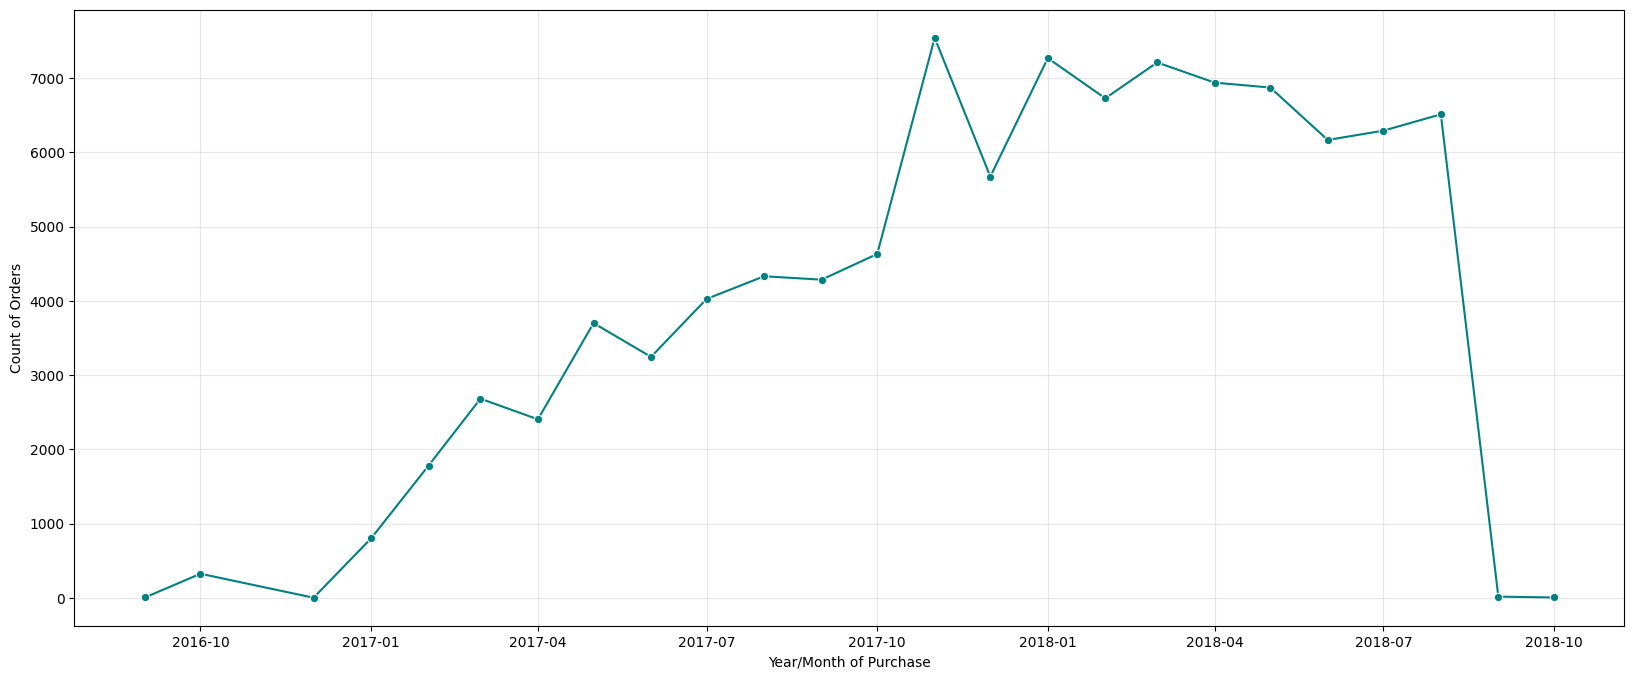

In [40]:
total_purchase_year=data['purchase_date'].dt.to_period("M").value_counts().reset_index()
total_purchase_year['purchase_date']=total_purchase_year['purchase_date'].dt.to_timestamp()
plt.figure(figsize=(20,8))
ax=sns.lineplot(y='count',x='purchase_date',data=total_purchase_year,color='teal',marker="o")
plt.grid(alpha=0.3)
plt.xlabel('Year/Month of Purchase')
plt.ylabel('Count of Orders')
plt.show()

`There is an upwards trajectory in order placed over time`

**How many orders are placed in each day of week?**

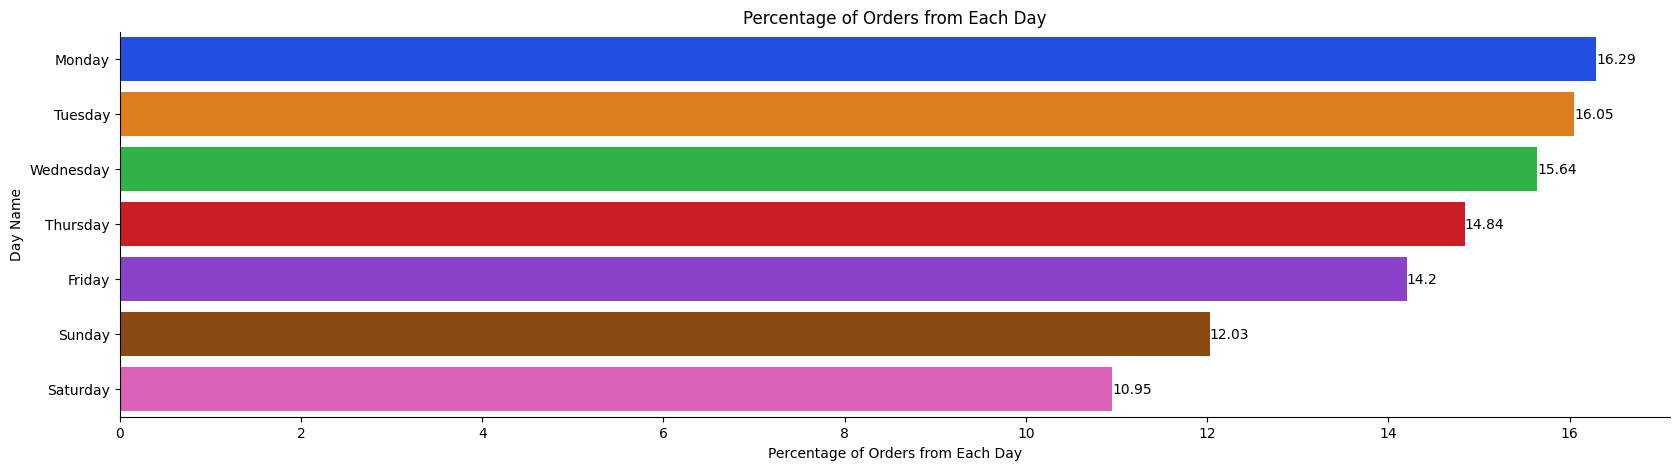

In [41]:
orders_each_day=round((data['purchase_date'].dt.day_name().value_counts(normalize=True)*100),2).reset_index()
plt.figure(figsize=(20,5))
ax=sns.barplot(y='purchase_date',x='proportion',data=orders_each_day,palette='bright')
for container in ax.containers:
    ax.bar_label(container)
plt.grid(0)
plt.ylabel('Day Name')
plt.xlabel('Percentage of Orders from Each Day')
plt.title('Percentage of Orders from Each Day')
sns.despine()
plt.show()

`Most of the orders are from week days, least of the orders are from weekends`

**What is the order pattern from each months?**

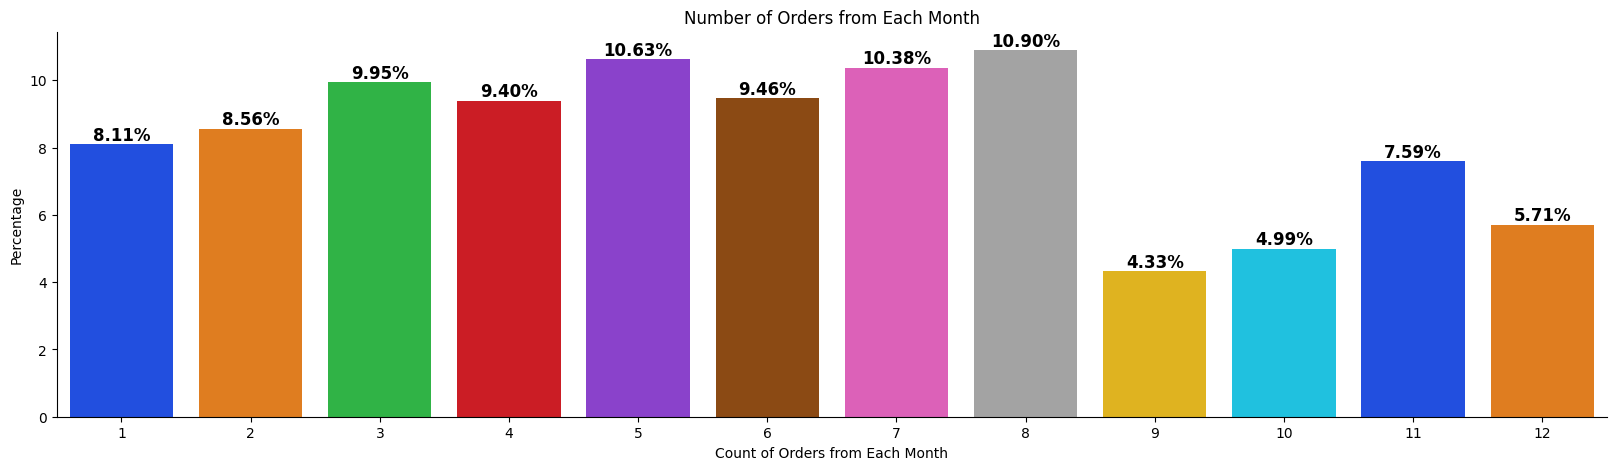

In [42]:
orders_each_month=round((data['purchase_date'].dt.month.value_counts(normalize=True)*100),2).reset_index().sort_values(by='purchase_date')
plt.figure(figsize=(20,5))
ax=sns.barplot(x='purchase_date',y='proportion',data=orders_each_month,palette='bright')
for container in ax.containers:
    ax.bar_label(container,fmt="%.2f%%",fontsize=12,weight='bold')
plt.grid(0)
plt.ylabel('Percentage')
plt.xlabel('Count of Orders from Each Month')
plt.title('Number of Orders from Each Month')
sns.despine()
plt.show()

`Orders are more in start of year than end of year`

### Approve Date

**What is the average approve time?**

In [43]:
(((data['approve_date'] - data['purchase_date']).dt.total_seconds())/3600).median()

np.float64(0.0)

In [44]:
(len((data['approve_date'] - data['purchase_date']).dt.total_seconds()[(data['approve_date'] - data['purchase_date']).dt.total_seconds()==0])/len(data)*100).__round__(2)

69.12

In [45]:
(data['approve_date'] - data['purchase_date']).max()

Timedelta('188 days 00:00:00')

`More than 69% orders are getting approved in same day`

### Delivered Carrier Date

**What is the average delivery time of carrier to deliver?**

In [46]:
(data['delivered_customer_date']-data['delivered_carrier_date']).dt.days.median()

np.float64(7.0)

`Approximately 1 week it takes to deliver the order to the customer`

In [47]:
data.iloc[(data['delivered_customer_date']-data['delivered_carrier_date']).dt.days[(data['delivered_customer_date']-data['delivered_carrier_date']).dt.days<0].index]


,order_id,status,purchase_date,approve_date,delivered_carrier_date,delivered_customer_date,estimated_delivery_date,customer_id,customer_zip,customer_city,customer_state,order_item_id,product_id,price,seller_id,freight_value,payment_sequential,payment_type,payment_installments,payment_value,seller_zip,seller_city,seller_state,product_category,purchase_time,approve_time,delivered_carrier_time,delivered_customer_time
6437,a1abeb653a4d4cd1e142ccb8c82cd069,delivered,2017-07-20,2017-07-21,2017-07-28,2017-07-25,2017-08-14,016c60628fc64e15fa5990e58a0b57c1,18550,boituva,SP,3.0,b9311d581f5f341576a5a2892168355c,229.74,ec4608a1f76453166bb312b2968aeaf4,74.81,1.0,boleto,1.0,304.56,13660.0,porto ferreira,SP,furniture_decor,morning,early morning,evening,evening
9553,383aa8b2724fe452d9ccd9934a8c628b,delivered,2017-07-02,2017-07-02,2017-07-07,2017-07-06,2017-07-21,6ffbd33f8e881a046e7bdd228ce90c8a,33600,pedro leopoldo,MG,2.0,eff955ba97941dc6837a770367d66944,83.80,1554a68530182680ad5c8b042c3ab563,27.44,1.0,credit_card,7.0,111.24,37580.0,monte siao,MG,furniture_decor,night,night,evening,afternoon
13487,cb1134f9010d242e9515ad1c78ec0c39,delivered,2017-07-16,2017-07-18,2017-07-20,2017-07-19,2017-08-08,8518c7888966eddd34b73abcc5165b07,9791,sao bernardo do campo,SP,2.0,77b61edc47d5dda4e6fb3568962d3e63,124.80,066a6914e1ebf3ea95a216c73a986b91,15.26,1.0,boleto,1.0,140.06,85863.0,foz do iguacu,PR,market_place,afternoon,early morning,evening,afternoon
14474,dceb62e8fa94b46006c9554fed743df0,delivered,2017-07-20,2017-07-22,2017-08-01,2017-07-26,2017-08-11,5e33331e26d0a4e1f3fe84b3f9c5549b,36500,uba,MG,3.0,42155695adbe665066ad812855fe523a,278.79,e9d99831abad74458942f21e16f33f92,51.28,2.0,voucher,1.0,330.06,3542.0,sao paulo,SP,electronics,night,morning,evening,evening
21338,8c78d01de3a9009e23d6877a7cc9be20,delivered,2016-10-08,2016-10-08,2016-10-26,2016-10-25,2016-11-30,6360ff9a3d58800ba0b03b1c6c290d92,11730,mongagua,SP,2.0,36696562bef043d7e07305d62baf5ca7,219.80,391fc6631aebcf3004804e51b40bcf1e,29.92,1.0,credit_card,7.0,249.72,14940.0,ibitinga,SP,furniture_decor,afternoon,evening,morning,evening
22520,b27af682321527a6349f1761eb3f360c,delivered,2017-06-14,2017-06-14,2017-06-27,2017-06-26,2017-07-14,0ec0111adb427dd69d1803a42c15eca6,7053,guarulhos,SP,2.0,e3425df9bd51be69917273c9dd92ed5e,141.89,86ccac0b835037332a596a33b6949ee1,37.24,1.0,credit_card,10.0,179.13,89041.0,blumenau,SC,watches_gifts,night,night,afternoon,afternoon
25646,e37f11cae9985ca58f0b56f268720537,delivered,2017-07-26,2017-07-27,2017-08-01,2017-07-31,2017-08-24,6d3d5771a12f5e7d00729f940bb28fd2,89707,concordia,SC,7.0,66e9fb73e349cba44b29951e558a6780,106.60,98dac6635aee4995d501a3972e047414,114.25,1.0,boleto,1.0,220.86,2030.0,sao paulo,SP,housewares,morning,morning,evening,evening
27470,fa3e37584f4fdb1ded0e0de700dfcb4e,delivered,2017-07-30,2017-07-30,2017-08-09,2017-08-01,2017-08-18,9caa8ec026abcc62b037581bb56da6a0,2245,sao paulo,SP,2.0,9e75c1e76e60e7ddab5d73da0e216234,91.70,53e4c6e0f4312d4d2107a8c9cddf45cd,19.51,1.0,credit_card,1.0,111.21,13920.0,pedreira,SP,housewares,evening,evening,evening,night
34939,c1e2bf2b7dd3309f2f5356c6b63968fa,delivered,2017-02-10,2017-02-10,2017-03-02,2017-02-14,2017-03-15,a6c7bbea6e469cbc9a4cd1fe3c7aff12,30310,belo horizonte,MG,2.0,91a5ae441d12befb1c62c19c4ffc940e,281.99,8a87611c08849ffeeccab52aa798b6c7,44.79,1.0,credit_card,2.0,326.78,82940.0,curitiba,PR,garden_tools,morning,morning,evening,afternoon
41636,b866af202be0692766081310cd4085e1,delivered,2017-01-27,2017-01-27,2017-02-20,2017-02-15,2017-04-17,64fbafb2935c7a2588d6a26a9d750487,3063,sao paulo,SP,2.0,63cbf4066cf395d6634831160ddacbbd,188.65,0b09101900100c0e9d312861fad5a1b9,18.00,1.0,credit_card,8.0,206.65,3168.0,sao paulo,SP,furniture_decor,afternoon,afternoon,midnight,midnight


`There are some orders where delivered to customer date is before delivered to the carrier, these are wrong entries I think`

**What is the average time to reach the carrier?**

In [48]:
(data['delivered_carrier_date']-data['approve_date']).dt.days.median()

np.float64(2.0)

`Generally it takes 2 days to reach the order to the carrier`

### Delivered Customer Date

**What is the average time to deliver after placing the order?**

In [49]:
(data['delivered_customer_date']-data['purchase_date']).dt.days.mean()

np.float64(12.497336125046644)

In [50]:
(data['delivered_customer_date']-data['purchase_date']).dt.days.median()

np.float64(10.0)

`It approximately takes 10-12 days to deliver after day or ordering`

### Estimated Delivery Date

**What is the average time company assumes to deliver any item?**

In [51]:
(data['estimated_delivery_date']-data['approve_date']).dt.days.median()

np.float64(23.0)

In [52]:
(data['estimated_delivery_date']-data['approve_date']).dt.days.mean()

np.float64(23.886262225400632)

`Company assumes on average it will take 23 days to reach any order to its customer`

### Customer ID

**How Many customers are there who have placed any order?**

In [53]:
data['customer_id'].nunique()

96096

**Who are the customers with most orders?**

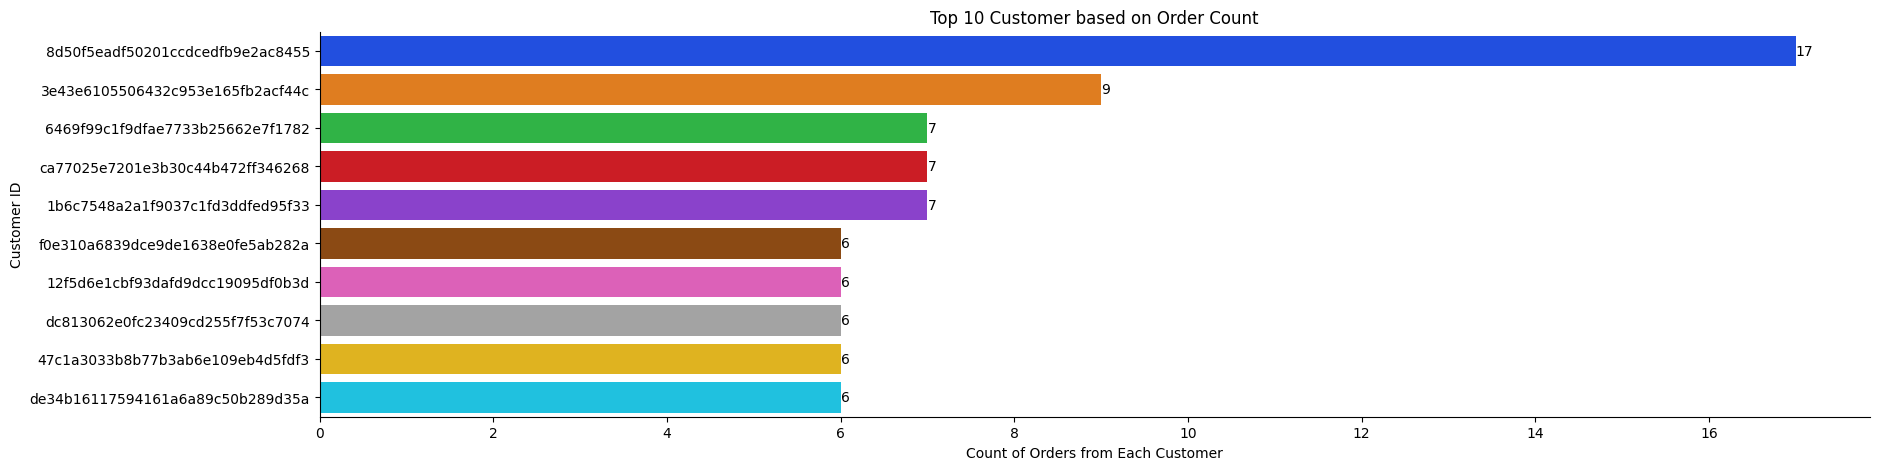

In [54]:
customers_with_most_orders=data['customer_id'].value_counts().reset_index().head(10)
plt.figure(figsize=(20,5))
ax=sns.barplot(y='customer_id',x='count',data=customers_with_most_orders,palette='bright')
for container in ax.containers:
    ax.bar_label(container)
plt.grid(0)
plt.ylabel('Customer ID')
plt.xlabel('Count of Orders from Each Customer')
plt.title('Top 10 Customer based on Order Count')
sns.despine()
plt.show()

`There is one customer with 17 orders`

### Customer ZIP

**What are the top 10 zip codes from which most of the customer are?**

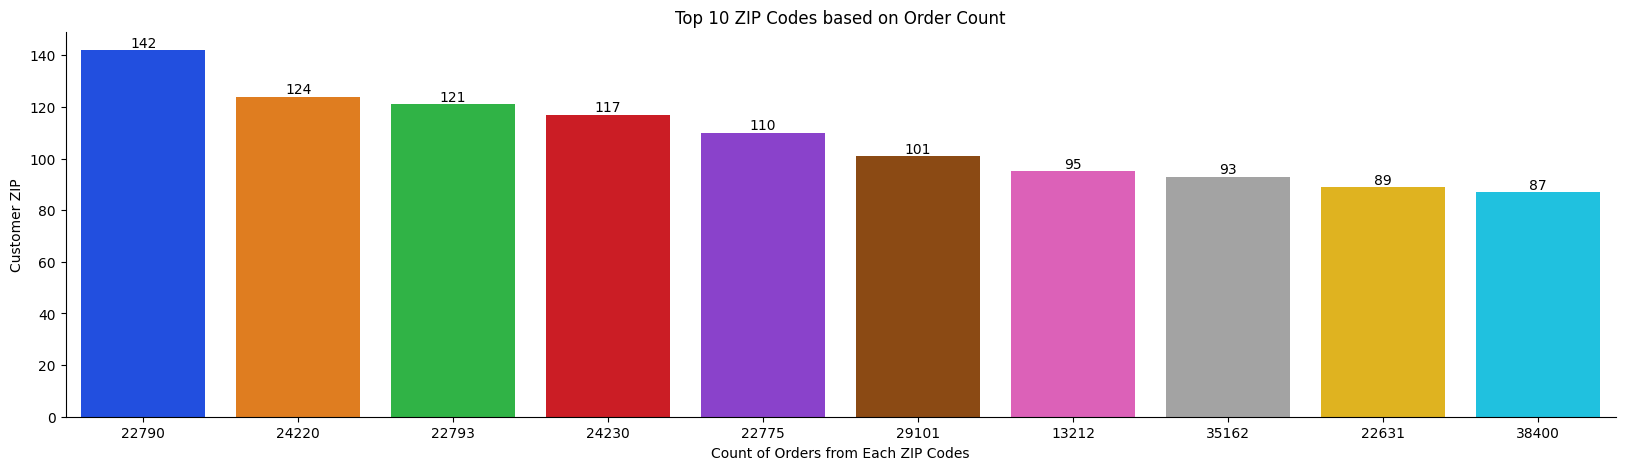

In [55]:
zip_with_most_orders=data['customer_zip'].value_counts().reset_index().sort_values(by='count',ascending=False).head(10)
plt.figure(figsize=(20,5))
ax=sns.barplot(x='customer_zip',y='count',data=zip_with_most_orders,palette='bright',order=zip_with_most_orders['customer_zip'])
for container in ax.containers:
    ax.bar_label(container)
plt.grid(0)
plt.ylabel('Customer ZIP')
plt.xlabel('Count of Orders from Each ZIP Codes')
plt.title('Top 10 ZIP Codes based on Order Count')
sns.despine()
plt.show()

### Customer City

**In how many city from the customers are**?

In [56]:
data['customer_city'].nunique()

4119

**Top 10 Cities with most customers**

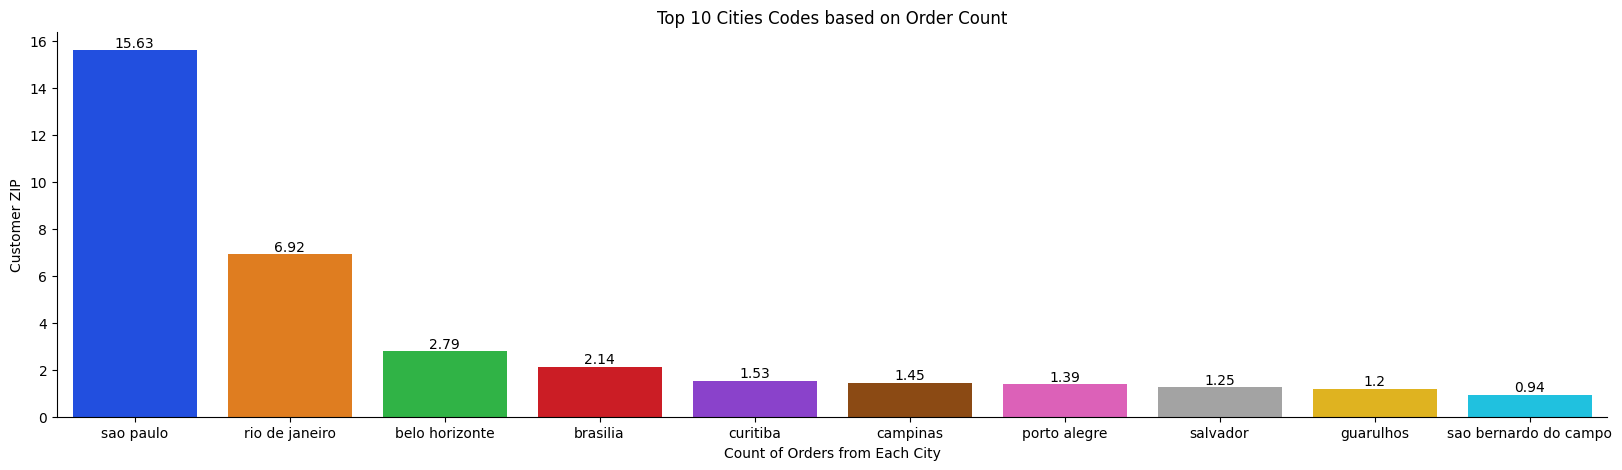

In [57]:
city_with_most_orders=(data['customer_city'].value_counts(normalize=True)*100).round(2).reset_index().head(10)
plt.figure(figsize=(20,5))
ax=sns.barplot(x='customer_city',y='proportion',data=city_with_most_orders,palette='bright',order=city_with_most_orders['customer_city'])
for container in ax.containers:
    ax.bar_label(container)
plt.grid(0)
plt.ylabel('Customer ZIP')
plt.xlabel('Count of Orders from Each City')
plt.title('Top 10 Cities Codes based on Order Count')
sns.despine()
plt.show()

`Sau Paulo is the top city by total orders, approx 16% of all orders among 4119 cities`

### Customer State

**From How many states customers are?**

In [58]:
data['customer_state'].nunique()

27

**What are the top 10 states with most orders?**

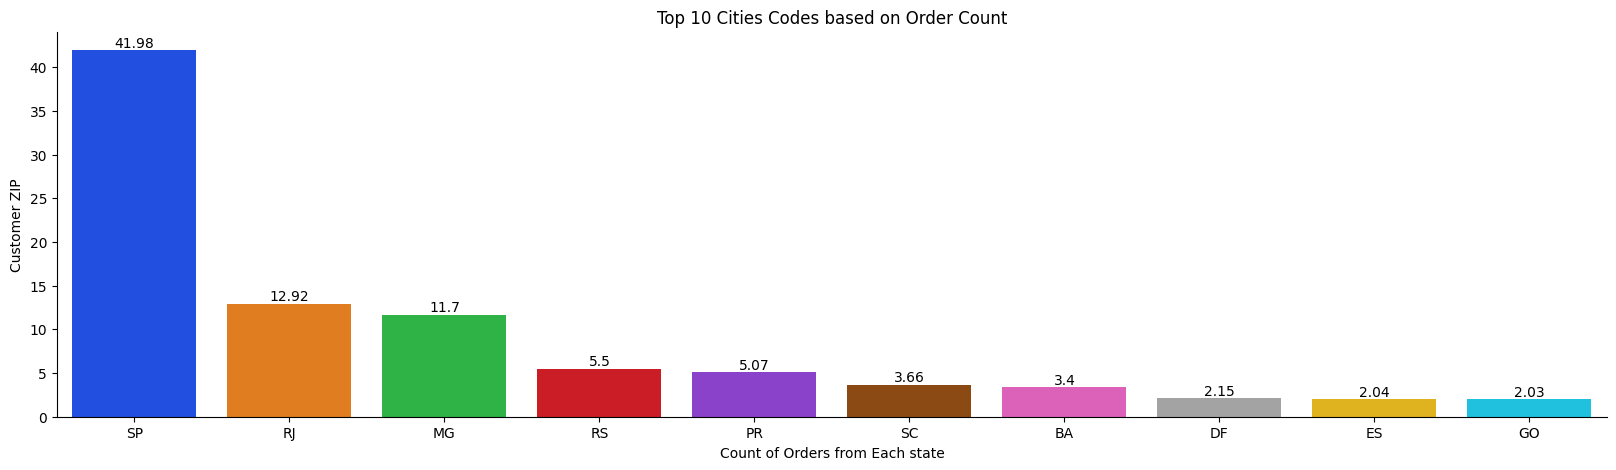

In [59]:
state_with_most_orders=(data['customer_state'].value_counts(normalize=True)*100).round(2).reset_index().head(10)
plt.figure(figsize=(20,5))
ax=sns.barplot(x='customer_state',y='proportion',data=state_with_most_orders,palette='bright',order=state_with_most_orders['customer_state'])
for container in ax.containers:
    ax.bar_label(container)
plt.grid(0)
plt.ylabel('Customer ZIP')
plt.xlabel('Count of Orders from Each state')
plt.title('Top 10 Cities Codes based on Order Count')
sns.despine()
plt.show()

`SP have significantly large amount of customers`

### Order Item ID

**What is the most frequent order item id?**

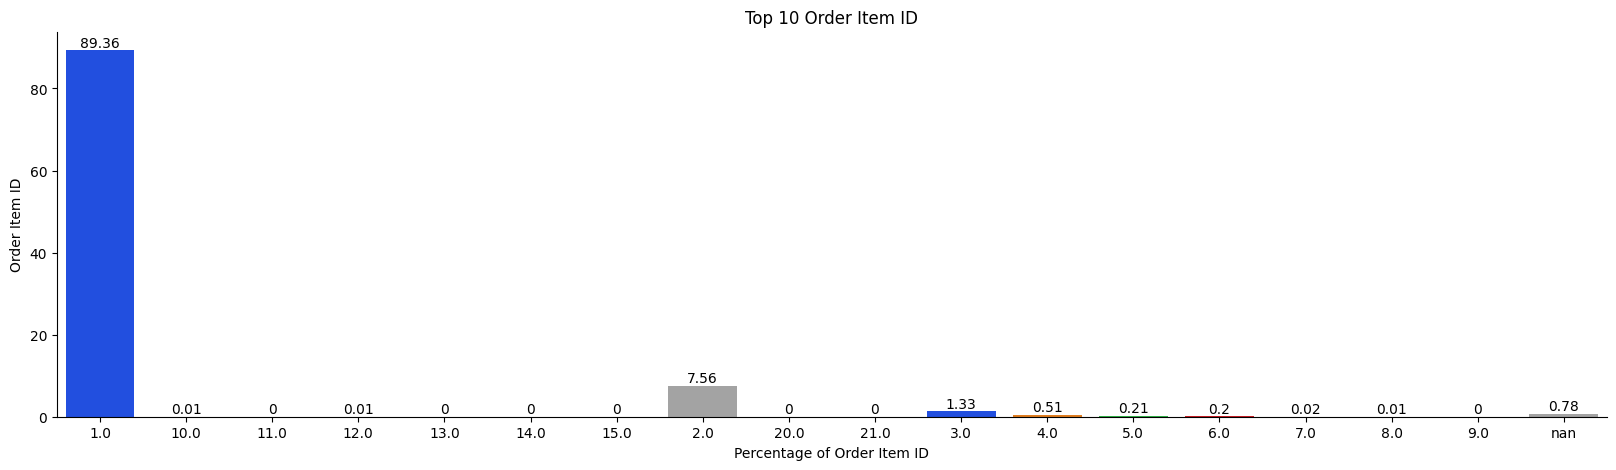

In [60]:
most_order_item_id=(data['order_item_id'].value_counts(normalize=True)*100).round(2).reset_index().sort_values(by='order_item_id')
plt.figure(figsize=(20,5))
ax=sns.barplot(x='order_item_id',y='proportion',data=most_order_item_id,palette='bright',order=most_order_item_id['order_item_id'])
for container in ax.containers:
    ax.bar_label(container)
plt.grid(0)
plt.ylabel('Order Item ID')
plt.xlabel('Percentage of Order Item ID')
plt.title('Top 10 Order Item ID')
sns.despine()
plt.show()

`90% of the orders have single item in a single order`

### Product ID

**How Many Unique products are there which are ordered?**

In [61]:
data['order_id'].nunique()

99441

**What are the top 10 most ordered product?**

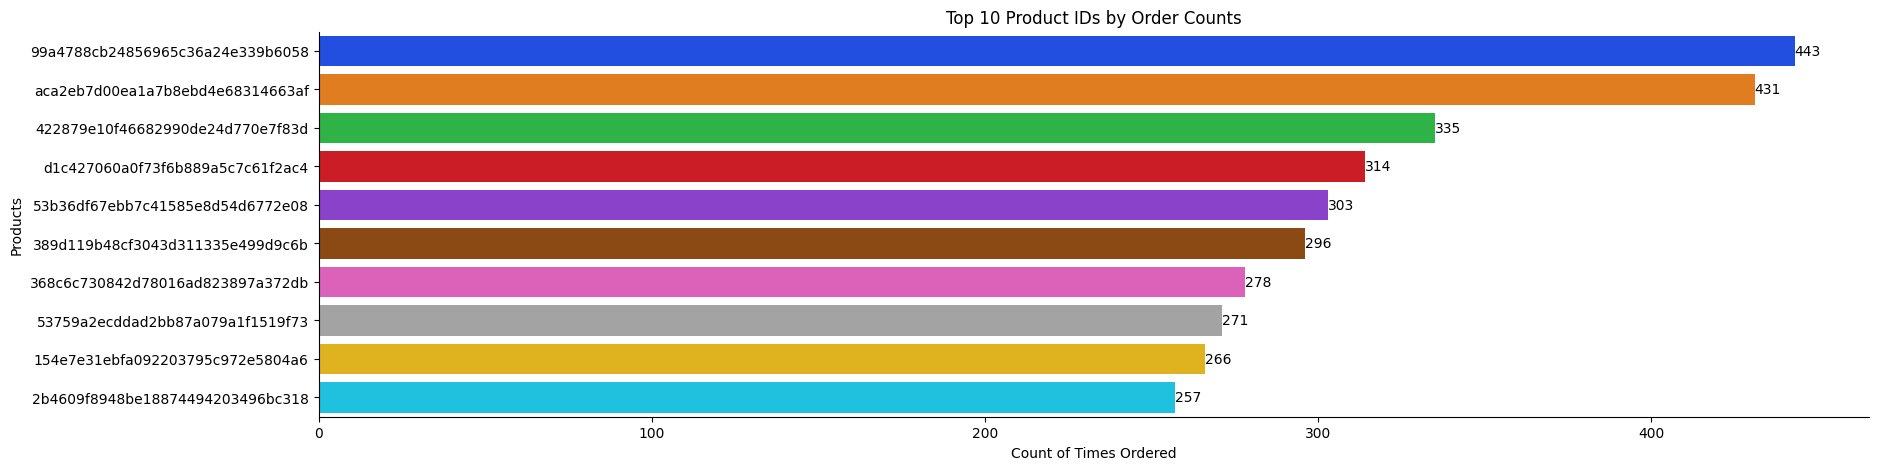

In [62]:
most_ordered_products=data['product_id'].value_counts().reset_index().sort_values(by='count',ascending=False).head(10)
plt.figure(figsize=(20,5))
ax=sns.barplot(y='product_id',x='count',data=most_ordered_products,palette='bright')
for container in ax.containers:
    ax.bar_label(container)
plt.grid(0)
plt.ylabel('Products')
plt.xlabel('Count of Times Ordered')
plt.title('Top 10 Product IDs by Order Counts')
sns.despine()
plt.show()

### Price

**What is the average price per order?**

In [63]:
data['price'].mean()

np.float64(137.75407637889447)

In [64]:
data['price'].median()

np.float64(86.9)

**What is the distribution of price?**

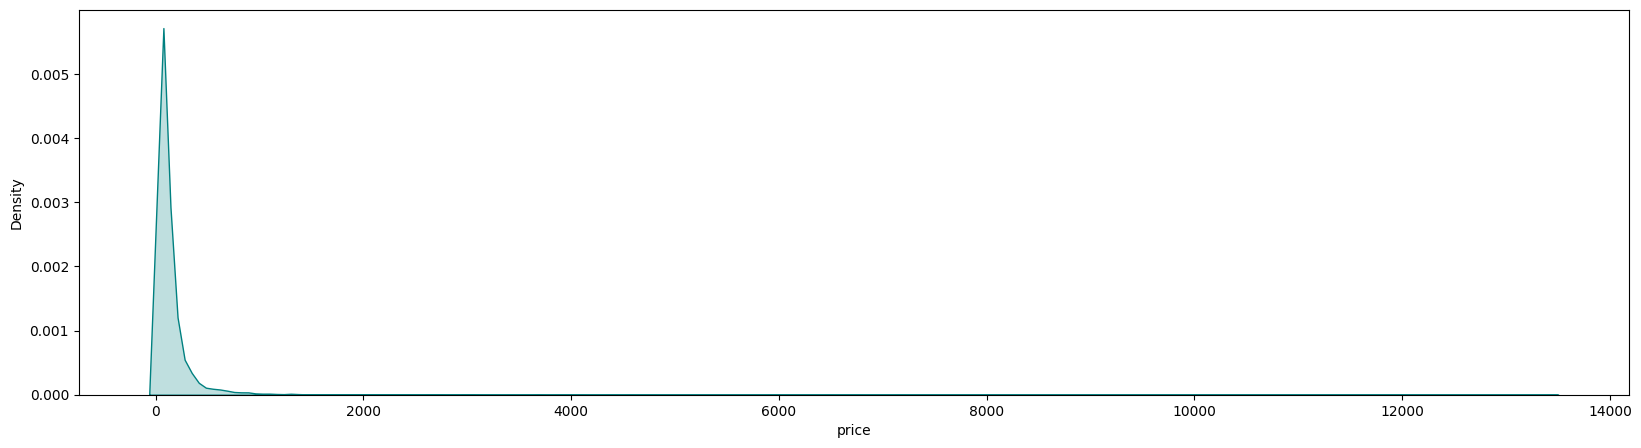

In [65]:
plt.figure(figsize=(20,5))
sns.kdeplot(x='price',data=data,color='teal',fill=True)
plt.show()

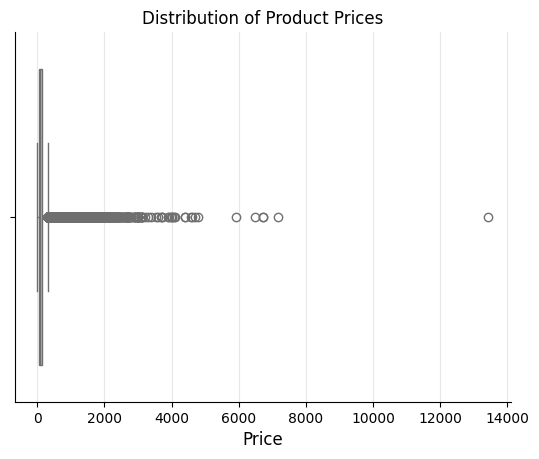

In [66]:
sns.boxplot(x=data['price'], color="skyblue")

plt.title("Distribution of Product Prices")
plt.xlabel("Price", fontsize=12)
plt.grid(alpha=0.3, axis='x')
sns.despine()
plt.show()

In [67]:
data[data['price']>5000]

,order_id,status,purchase_date,approve_date,delivered_carrier_date,delivered_customer_date,estimated_delivery_date,customer_id,customer_zip,customer_city,customer_state,order_item_id,product_id,price,seller_id,freight_value,payment_sequential,payment_type,payment_installments,payment_value,seller_zip,seller_city,seller_state,product_category,purchase_time,approve_time,delivered_carrier_time,delivered_customer_time
3508,f5136e38d1a14a4dbd87dff67da82701,delivered,2017-05-24,2017-05-26,2017-05-26,2017-06-05,2017-06-28,ff4159b92c40ebe40454e3e6a7c35ed6,17506,marilia,SP,1.0,1bdf5e6731585cf01aa8169c7028d6ad,6499.0,ee27a8f15b1dded4d213a468ba4eb391,227.66,1.0,boleto,1.0,6726.66,74210.0,goiania,GO,art,evening,midnight,morning,evening
13390,03caa2c082116e1d31e67e9ae3700499,delivered,2017-09-29,2017-10-02,2017-10-10,2017-10-17,2017-10-23,0a0a92112bd4c708ca5fde585afaa872,20080,rio de janeiro,RJ,8.0,5769ef0a239114ac3a854af00df129e4,13440.0,b37c4c02bda3161a7546a4e6d222d5b2,224.08,1.0,credit_card,1.0,13664.08,3667.0,sao paulo,SP,fixed_telephony,afternoon,afternoon,afternoon,evening
22171,0812eb902a67711a1cb742b3cdaa65ae,delivered,2017-02-12,2017-02-12,2017-02-16,2017-03-03,2017-03-09,dc4802a71eae9be1dd28f5d788ceb526,79042,campo grande,MS,1.0,489ae2aa008f021502940f251d4cce7f,6735.0,e3b4998c7a498169dc7bce44e6bb6277,194.31,1.0,credit_card,8.0,6929.31,3635.0,sao paulo,SP,housewares,night,night,morning,afternoon
28326,fefacc66af859508bf1a7934eab1e97f,delivered,2018-07-25,2018-07-27,2018-08-03,2018-08-15,2018-08-10,459bef486812aa25204be022145caa62,29066,vitoria,ES,1.0,69c590f7ffc7bf8db97190b6cb6ed62e,6729.0,80ceebb4ee9b31afb6c6a916a574a1e2,193.21,1.0,boleto,1.0,6922.21,86026.0,londrina,PR,computers,evening,midnight,afternoon,afternoon
32322,2cc9089445046817a7539d90805e6e5a,delivered,2017-11-24,2017-11-28,2017-12-06,2017-12-13,2017-12-22,4007669dec559734d6f53e029e360987,35501,divinopolis,MG,6.0,c183fd5d2abf05873fa6e1014ed9e06c,5934.6,f08a5b9dd6767129688d001acafc21e5,146.94,1.0,boleto,1.0,6081.54,90230.0,porto alegre,RS,agro_industry_and_commerce,morning,afternoon,morning,afternoon
66599,736e1922ae60d0d6a89247b851902527,delivered,2018-07-15,2018-07-17,2018-07-20,2018-07-26,2018-08-02,763c8b1c9c68a0229c42c9fc6f662b93,29102,vila velha,ES,4.0,19936fa4f614ee0590d3b77ac83fd648,7160.0,b37c4c02bda3161a7546a4e6d222d5b2,114.88,1.0,boleto,1.0,7274.88,3667.0,sao paulo,SP,fixed_telephony,afternoon,midnight,afternoon,night


`There are 6 orders with more than 5000 price, that is why price is so skewed`

In [68]:
data['price'].describe()

count    98666.000000
mean       137.754076
std        210.645145
min          0.850000
25%         45.900000
50%         86.900000
75%        149.900000
max      13440.000000
Name: price, dtype: float64

In [69]:
data['price'].quantile(.99)

np.float64(998.9)

`99 percentile of order price falls under 1000`

### Seller ID

**How many sellers are there from whom there is some order**

In [70]:
data['seller_id'].nunique()

3084

**Who are the top 10 most ordered sellers?**

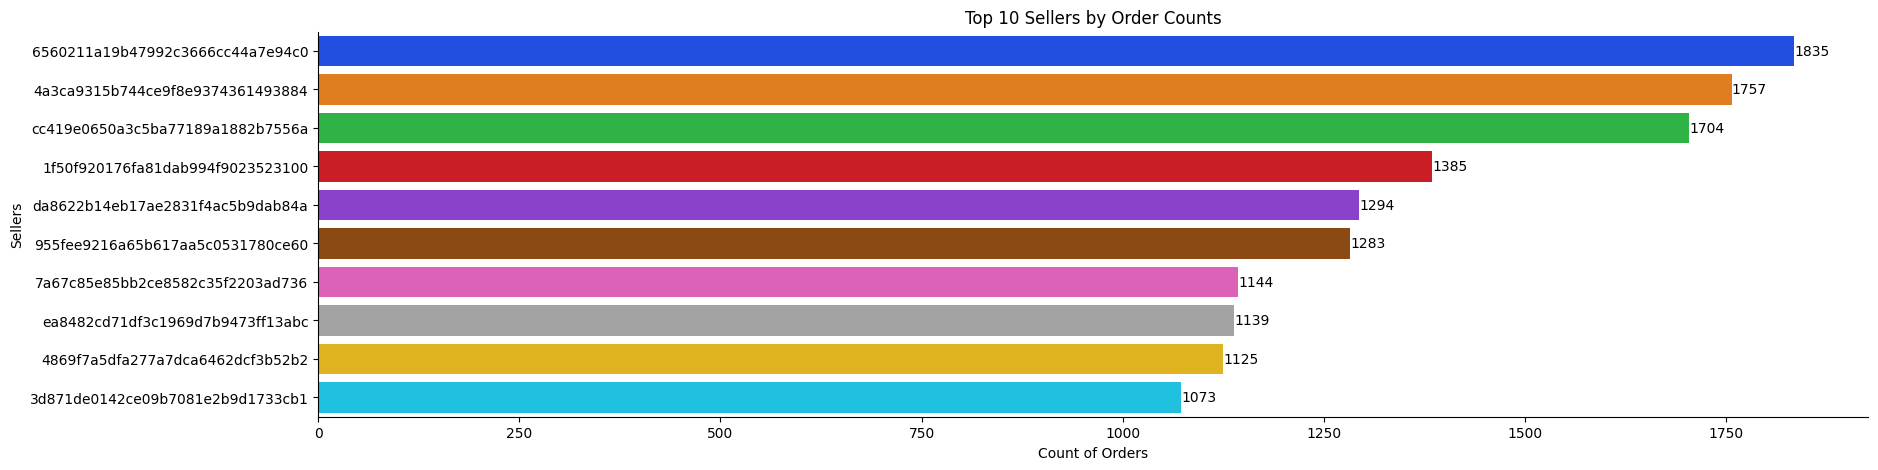

In [71]:
most_ordered_sellers=data['seller_id'].value_counts().reset_index().sort_values(by='count',ascending=False).head(10)
plt.figure(figsize=(20,5))
ax=sns.barplot(y='seller_id',x='count',data=most_ordered_sellers,palette='bright')
for container in ax.containers:
    ax.bar_label(container)
plt.grid(0)
plt.ylabel('Sellers')
plt.xlabel('Count of Orders')
plt.title('Top 10 Sellers by Order Counts')
sns.despine()
plt.show()

**What is Median order count per seller?**

In [72]:
data.groupby('seller_id')['order_id'].count().median()

np.float64(6.0)

### Freight Value

**What is the average freight value?**

In [73]:
data['freight_value'].median()

np.float64(17.17)

In [74]:
data['freight_value'].mean()

np.float64(22.823561713254826)

**What is the distribution of freight value?**

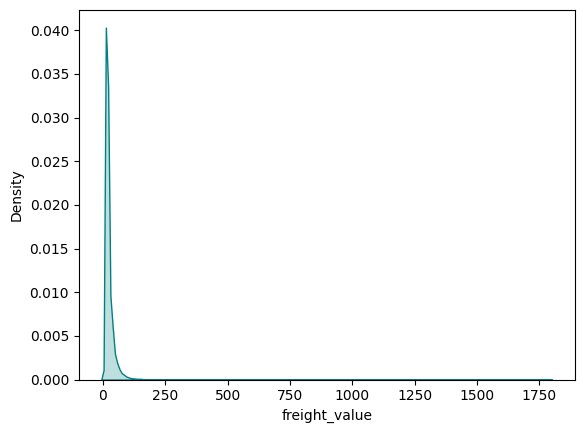

In [75]:
sns.kdeplot(x='freight_value',data=data,color='teal',fill=True)
plt.show()

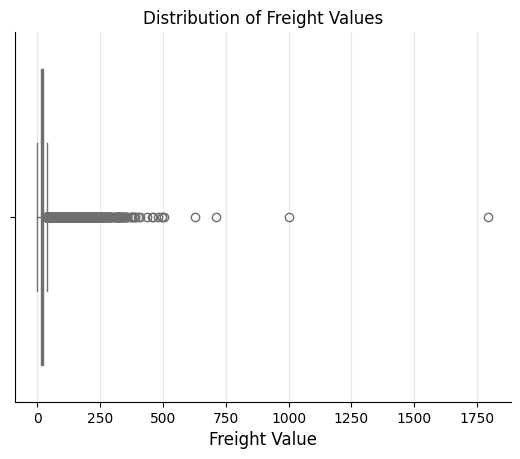

In [76]:
sns.boxplot(x=data['freight_value'], color="skyblue")

plt.title("Distribution of Freight Values")
plt.xlabel("Freight Value", fontsize=12)
plt.grid(alpha=0.3, axis='x')
sns.despine()
plt.show()

In [77]:
data[data['freight_value']>500]

,order_id,status,purchase_date,approve_date,delivered_carrier_date,delivered_customer_date,estimated_delivery_date,customer_id,customer_zip,customer_city,customer_state,order_item_id,product_id,price,seller_id,freight_value,payment_sequential,payment_type,payment_installments,payment_value,seller_zip,seller_city,seller_state,product_category,purchase_time,approve_time,delivered_carrier_time,delivered_customer_time
16335,71dab1155600756af6de79de92e712e3,delivered,2018-02-01,2018-02-01,2018-02-19,2018-03-12,2018-03-22,eae0a83d752b1dd32697e0e7b4221656,48410,cicero dantas,BA,11.0,90b58782fdd04cb829667fcc41fb65f5,1361.89,7c67e1448b00f6e969d365cea6b010ab,626.64,1.0,credit_card,10.0,1988.55,8577.0,itaquaquecetuba,SP,office_furniture,evening,evening,evening,evening
20074,cf4659487be50c0c317cff3564c4a840,delivered,2018-07-02,2018-07-05,2018-07-06,2018-07-16,2018-08-01,fff5eb4918b2bf4b2da476788d42051c,58407,campina grande,PB,6.0,bc3c6d2a621414f2e1df7a8a32a2828e,1050.00,56e361f411e38dcef17cdc2a3d99628b,1794.96,1.0,boleto,1.0,2844.96,7113.0,guarulhos,SP,signaling_and_security,evening,evening,morning,morning
27964,17784b9fbb37fb0bdc230d8ed6f6b355,delivered,2018-03-08,2018-03-09,2018-03-12,2018-03-23,2018-04-04,5a494c648fde2d1ec4eb614274ea7159,44900,irece,BA,6.0,acc444eb5ad26f79d5a11baa6a03c439,840.00,1025f0e2d44d7041d6cf58b6550e0bfa,502.98,1.0,credit_card,1.0,1342.98,3204.0,sao paulo,SP,furniture_decor,evening,evening,night,afternoon
63700,2455cbeb73fd04b170ca2504662f95ce,delivered,2017-06-20,2017-06-22,2017-06-26,2017-06-30,2017-07-12,066ee6b9c6fc284260ff9a1274a82ca7,84174,castro,PR,6.0,b6e406be1aa00db8be5dd3ec6b524d4d,419.40,e8f6dc8e6a1dcde89d20e3995c8d90b3,1002.29,1.0,boleto,1.0,1421.69,3476.0,sao paulo,SP,furniture_decor,afternoon,midnight,afternoon,afternoon
88772,cfed507ac357129f750f05a0d7d71b15,delivered,2018-02-25,2018-02-26,2018-03-08,2018-04-06,2018-03-27,ef7361e14a64f77990f58e9c571e2f9a,65800,balsas,MA,3.0,b6106bf3d09b8fdd33c3a9559da43145,1380.00,08cdbae123ff67ca4e36d9d641ce0119,711.33,1.0,credit_card,10.0,2091.33,36504.0,uba,MG,furniture_living_room,afternoon,night,evening,midnight


`There are only 5 orders with freight value greater than 500`

In [78]:
data['freight_value'].quantile(.99)

np.float64(104.98350000000006)

`99 percentile of the freight values falls under 105`

### Payment Sequential

**What is the most used payment sequential?**

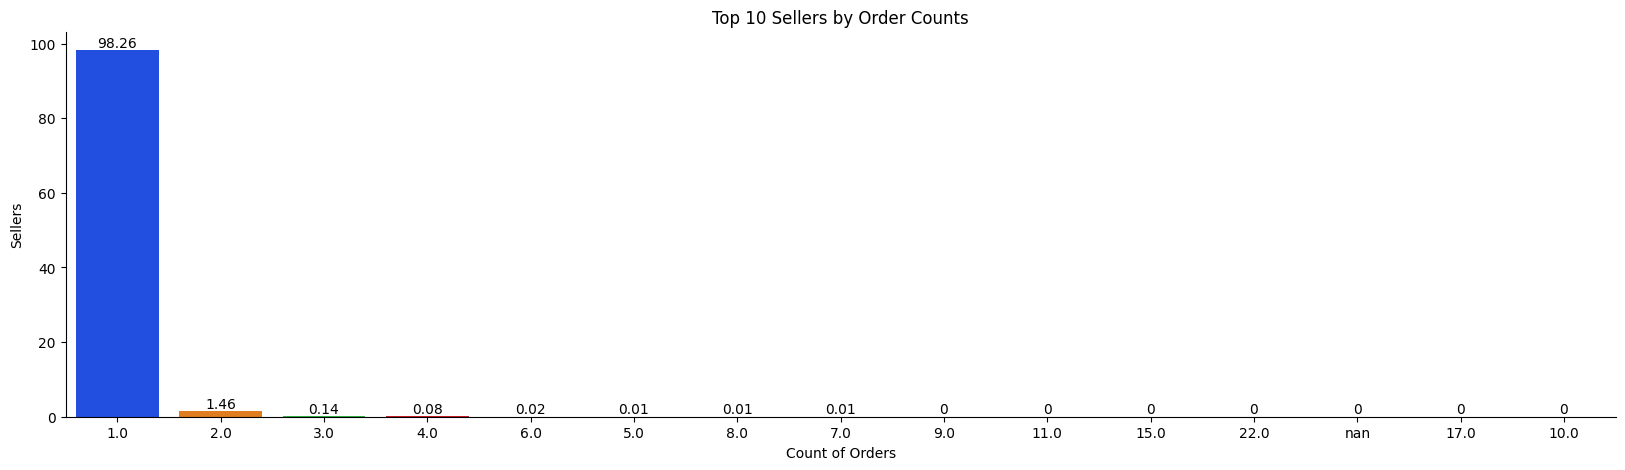

In [79]:
most_ordered_payment_seq=round((data['payment_sequential'].value_counts(normalize=True)*100),2).reset_index()
plt.figure(figsize=(20,5))
ax=sns.barplot(x='payment_sequential',y='proportion',data=most_ordered_payment_seq,palette='bright')
for container in ax.containers:
    ax.bar_label(container)
plt.grid(0)
plt.ylabel('Sellers')
plt.xlabel('Count of Orders')
plt.title('Top 10 Sellers by Order Counts')
sns.despine()
plt.show()

`Approx 99% of people pay using 1 or 2 payment sequence`

### Payment Type

**How many payment types are available?**

In [80]:
data['payment_type'].value_counts()

payment_type
credit_card    75233
boleto         19784
voucher         2892
debit_card      1528
not_defined        3
Name: count, dtype: int64

`There are 4 major payment types`

**What are the usage of different payment types?**

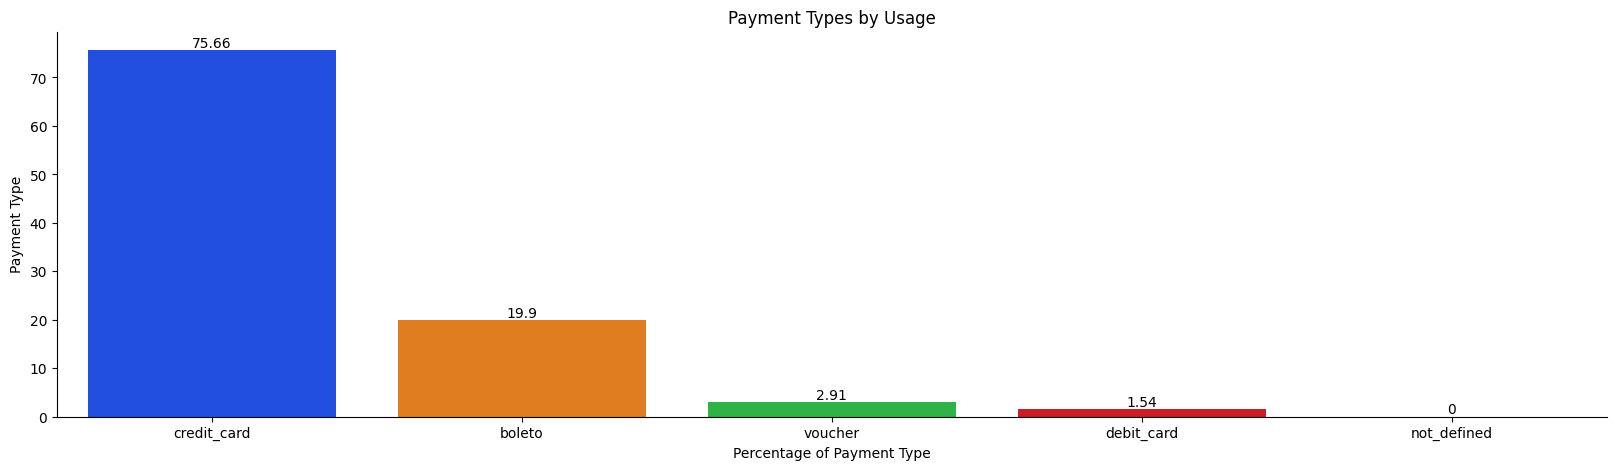

In [81]:
most_used_payment_type=round((data['payment_type'].value_counts(normalize=True)*100),2).reset_index()
plt.figure(figsize=(20,5))
ax=sns.barplot(x='payment_type',y='proportion',data=most_used_payment_type,palette='bright')
for container in ax.containers:
    ax.bar_label(container)
plt.grid(0)
plt.ylabel('Payment Type')
plt.xlabel('Percentage of Payment Type')
plt.title('Payment Types by Usage')
sns.despine()
plt.show()

In [82]:
data[data['payment_type']=='not_defined']

,order_id,status,purchase_date,approve_date,delivered_carrier_date,delivered_customer_date,estimated_delivery_date,customer_id,customer_zip,customer_city,customer_state,order_item_id,product_id,price,seller_id,freight_value,payment_sequential,payment_type,payment_installments,payment_value,seller_zip,seller_city,seller_state,product_category,purchase_time,approve_time,delivered_carrier_time,delivered_customer_time
1130,00b1cb0320190ca0daa2c88b35206009,canceled,2018-08-28,NaT,NaT,NaT,2018-09-12,4fa4365000c7090fcb8cad5713c6d3db,1151,sao paulo,SP,nan,NaN,NaN,NaN,NaN,1.0,not_defined,1.0,0.0,nan,NaN,NaN,NaN,afternoon,midnight,midnight,midnight
39919,4637ca194b6387e2d538dc89b124b0ee,canceled,2018-09-03,NaT,NaT,NaT,2018-09-10,968fac81e2c44fb6c1e3ac2a45e6a102,4685,sao paulo,SP,nan,NaN,NaN,NaN,NaN,1.0,not_defined,1.0,0.0,nan,NaN,NaN,NaN,afternoon,midnight,midnight,midnight
40235,c8c528189310eaa44a745b8d9d26908b,canceled,2018-08-28,NaT,NaT,NaT,2018-09-11,6ba987d564bad1f9da8e14b9d3b71c8f,8042,sao paulo,SP,nan,NaN,NaN,NaN,NaN,1.0,not_defined,1.0,0.0,nan,NaN,NaN,NaN,night,midnight,midnight,midnight


`3 of the cancel payments have undefined payment type as they were not paid`

### Payment Installments

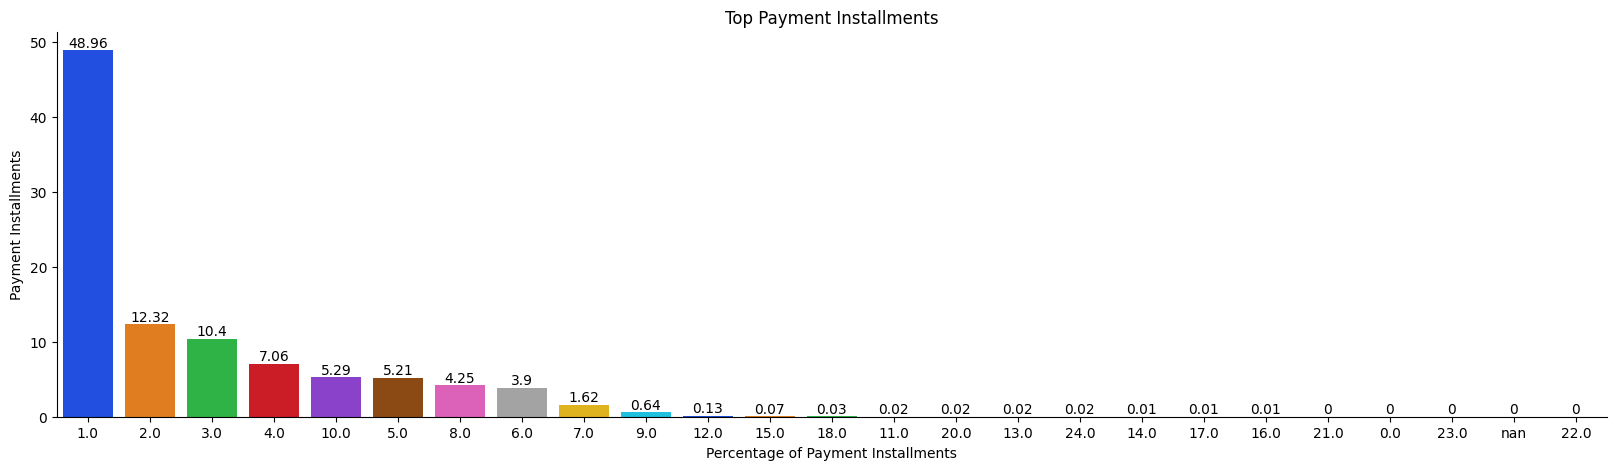

In [83]:
most_used_payment_installments=round((data['payment_installments'].value_counts(normalize=True)*100),2).reset_index()
plt.figure(figsize=(20,5))
ax=sns.barplot(x='payment_installments',y='proportion',data=most_used_payment_installments,palette='bright')
for container in ax.containers:
    ax.bar_label(container)
plt.grid(0)
plt.ylabel('Payment Installments')
plt.xlabel('Percentage of Payment Installments')
plt.title('Top Payment Installments')
sns.despine()
plt.show()

In [84]:
data[data['payment_installments']==0]

,order_id,status,purchase_date,approve_date,delivered_carrier_date,delivered_customer_date,estimated_delivery_date,customer_id,customer_zip,customer_city,customer_state,order_item_id,product_id,price,seller_id,freight_value,payment_sequential,payment_type,payment_installments,payment_value,seller_zip,seller_city,seller_state,product_category,purchase_time,approve_time,delivered_carrier_time,delivered_customer_time


`There are 0 payment installments for 2 entries`

### Payment Value

`This is consist of price and frieght value, so there will not be any specific infoarmation using univariate analysis`

### Seller ZIP

**What are the top 10 ZIP codes of sellers?**

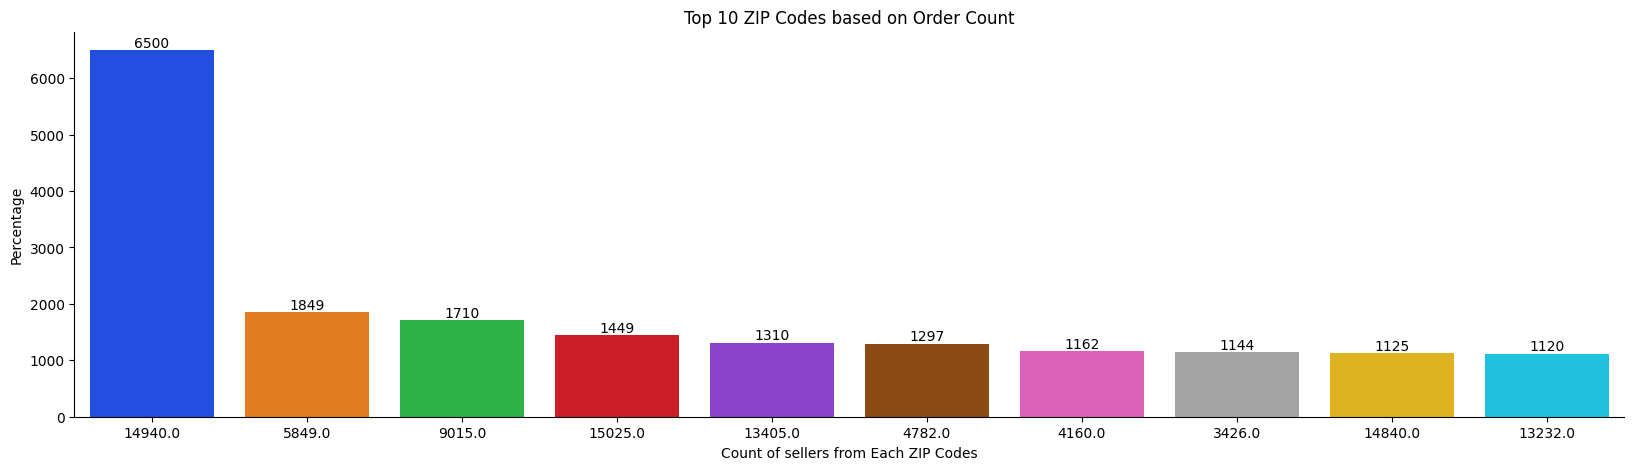

In [85]:
zip_with_most_sellers=data['seller_zip'].value_counts().reset_index().sort_values(by='count',ascending=False).head(10)
plt.figure(figsize=(20,5))
ax=sns.barplot(x='seller_zip',y='count',data=zip_with_most_sellers,palette='bright',order=zip_with_most_sellers['seller_zip'])
for container in ax.containers:
    ax.bar_label(container)
plt.grid(0)
plt.ylabel('Percentage')
plt.xlabel('Count of sellers from Each ZIP Codes')
plt.title('Top 10 ZIP Codes based on Order Count')
sns.despine()
plt.show()

### Seller City

**what are the Top 10 Cities with most sellers?**

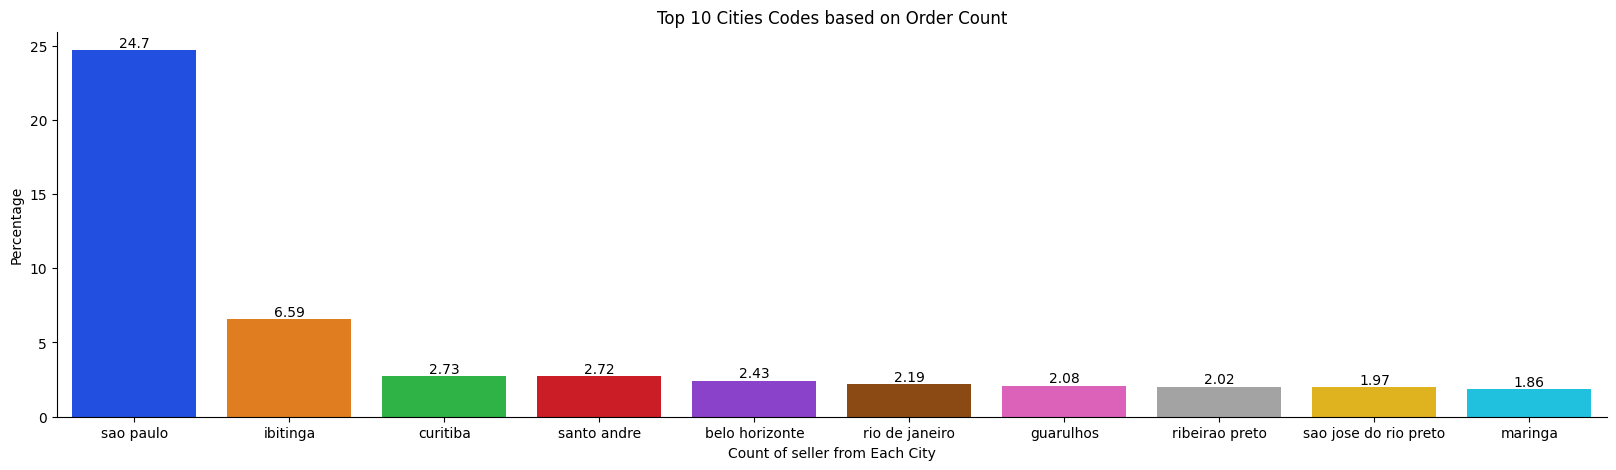

In [86]:
state_with_most_seller=(data['seller_city'].value_counts(normalize=True)*100).round(2).reset_index().head(10)
plt.figure(figsize=(20,5))
ax=sns.barplot(x='seller_city',y='proportion',data=state_with_most_seller,palette='bright',order=state_with_most_seller['seller_city'])
for container in ax.containers:
    ax.bar_label(container)
plt.grid(0)
plt.ylabel('Percentage')
plt.xlabel('Count of seller from Each City')
plt.title('Top 10 Cities Codes based on Order Count')
sns.despine()
plt.show()

### Seller State

**What are the top states with most sellers?**

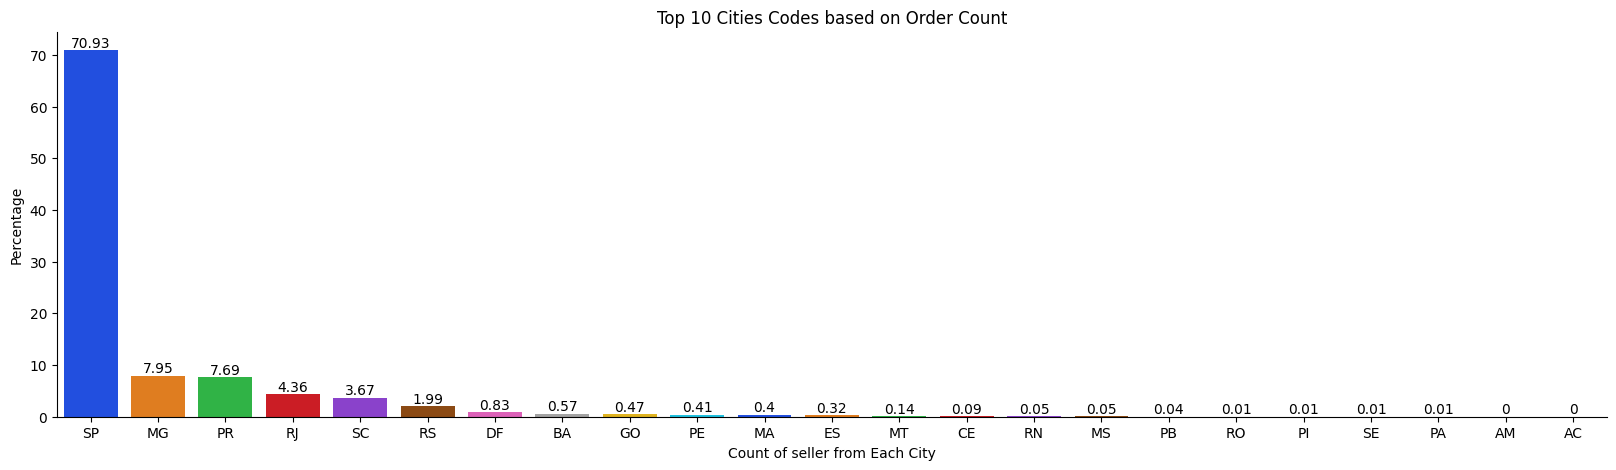

In [87]:
state_with_most_seller=(data['seller_state'].value_counts(normalize=True)*100).round(2).reset_index()
plt.figure(figsize=(20,5))
ax=sns.barplot(x='seller_state',y='proportion',data=state_with_most_seller,palette='bright',order=state_with_most_seller['seller_state'])
for container in ax.containers:
    ax.bar_label(container)
plt.grid(0)
plt.ylabel('Percentage')
plt.xlabel('Count of seller from Each City')
plt.title('Top 10 Cities Codes based on Order Count')
sns.despine()
plt.show()

### Product Category

**How many unique categories of products are there that has been ordered?**

In [88]:
data['product_category'].nunique()

71

**What are the most ordered product category?**

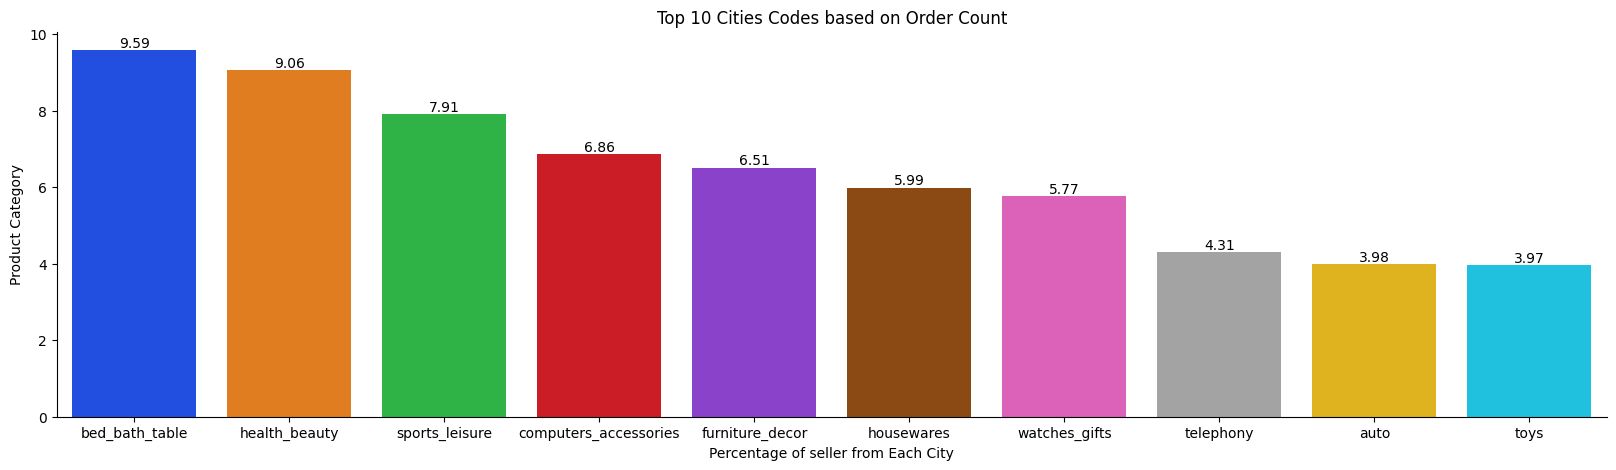

In [89]:
most_ordered_product_category=(data['product_category'].value_counts(normalize=True)*100).round(2).reset_index().head(10)
plt.figure(figsize=(20,5))
ax=sns.barplot(x='product_category',y='proportion',data=most_ordered_product_category,palette='bright',order=most_ordered_product_category['product_category'])
for container in ax.containers:
    ax.bar_label(container)
plt.grid(0)
plt.ylabel('Product Category')
plt.xlabel('Percentage of seller from Each City')
plt.title('Top 10 Cities Codes based on Order Count')
sns.despine()
plt.show()

### Purchase Time

**What is the proportion of purchase time?**

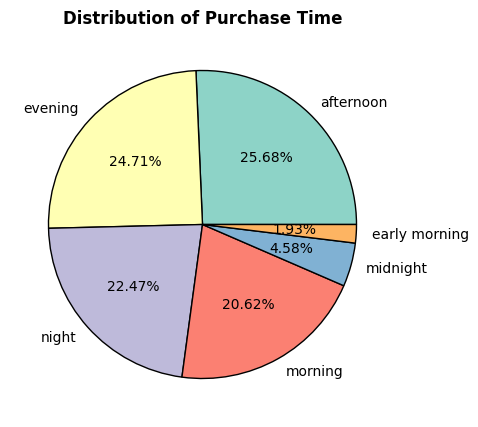

In [90]:
purchase_time_count=data['purchase_time'].value_counts()
plt.figure(figsize=(5,5))
plt.pie(purchase_time_count,labels=purchase_time_count.index,autopct="%.2f%%",colors=plt.cm.Set3.colors,wedgeprops={'edgecolor':'black'})
plt.title("Distribution of Purchase Time",weight='bold')
plt.show()

`Most of the purchase are done between 12PM to 12AM`

### Approve Time

**What is the proportion of approve time?**

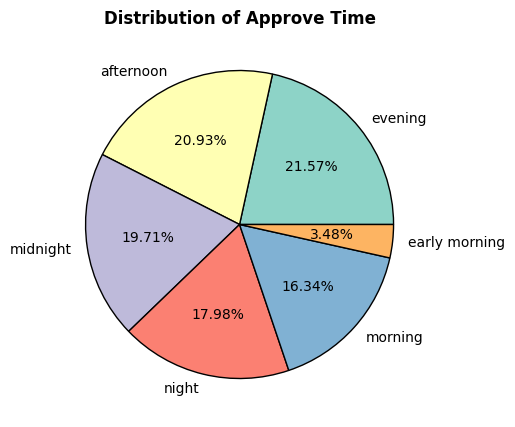

In [91]:
approve_time_count=data['approve_time'].value_counts()
plt.figure(figsize=(5,5))
plt.pie(approve_time_count,labels=approve_time_count.index,autopct="%.2f%%",colors=plt.cm.Set3.colors,wedgeprops={'edgecolor':'black'})
plt.title("Distribution of Approve Time",weight='bold')
plt.show()

`Orders are getting approved through out the day, but very less at early morning`

### Delivered Carrier Time

**What is the proportion of delivered carrier time?**

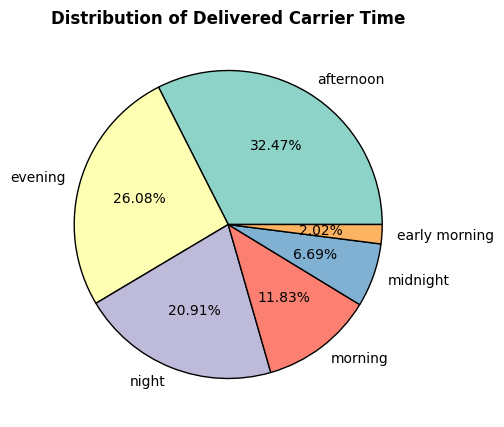

In [92]:
delivered_carrier_time_count=data['delivered_carrier_time'].value_counts()
plt.figure(figsize=(5,5))
plt.pie(delivered_carrier_time_count,labels=delivered_carrier_time_count.index,autopct="%.2f%%",colors=plt.cm.Set3.colors,wedgeprops={'edgecolor':'black'})
plt.title("Distribution of Delivered Carrier Time",weight='bold')
plt.show()

`Product are reaching carrier mostly from 12PM to 12AM`

### Delivered Customer Time

**What is the proportion of delivered customer time?**

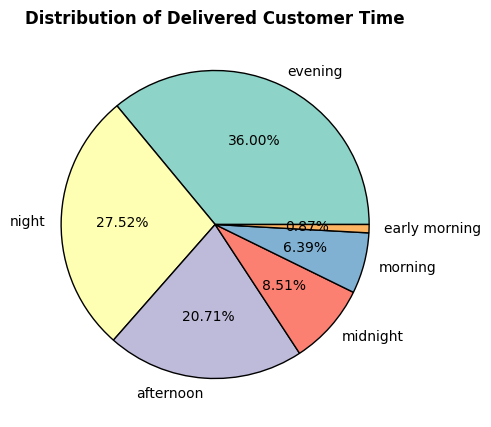

In [93]:
delivered_customer_time_count=data['delivered_customer_time'].value_counts()
plt.figure(figsize=(5,5))
plt.pie(delivered_customer_time_count,labels=delivered_customer_time_count.index,autopct="%.2f%%",colors=plt.cm.Set3.colors,wedgeprops={'edgecolor':'black'})
plt.title("Distribution of Delivered Customer Time",weight='bold')
plt.show()

`Delivery is also most probabily happen between 12PM to 12AM`

## Bivariate Analysis

In [94]:
data.columns

Index(['order_id', 'status', 'purchase_date', 'approve_date',
       'delivered_carrier_date', 'delivered_customer_date',
       'estimated_delivery_date', 'customer_id', 'customer_zip',
       'customer_city', 'customer_state', 'order_item_id', 'product_id',
       'price', 'seller_id', 'freight_value', 'payment_sequential',
       'payment_type', 'payment_installments', 'payment_value', 'seller_zip',
       'seller_city', 'seller_state', 'product_category', 'purchase_time',
       'approve_time', 'delivered_carrier_time', 'delivered_customer_time'],
      dtype='object')

In [95]:
id_column=['order_id','seller_id','customer_id']
date_columns=data.select_dtypes(include='datetime').columns.tolist()
geo_location_columns=['customer_zip','customer_city', 'customer_state','seller_zip','seller_city', 'seller_state']
numerical_columns=data.select_dtypes(include='number').columns.tolist()
not_to_keep=id_column+geo_location_columns
not_to_keep
categorical_columns=data.select_dtypes(include='object').columns.tolist()
categorical_columns= [cols for cols in categorical_columns if cols not in not_to_keep]

### Date Analysis

**Is price increasing with date?**

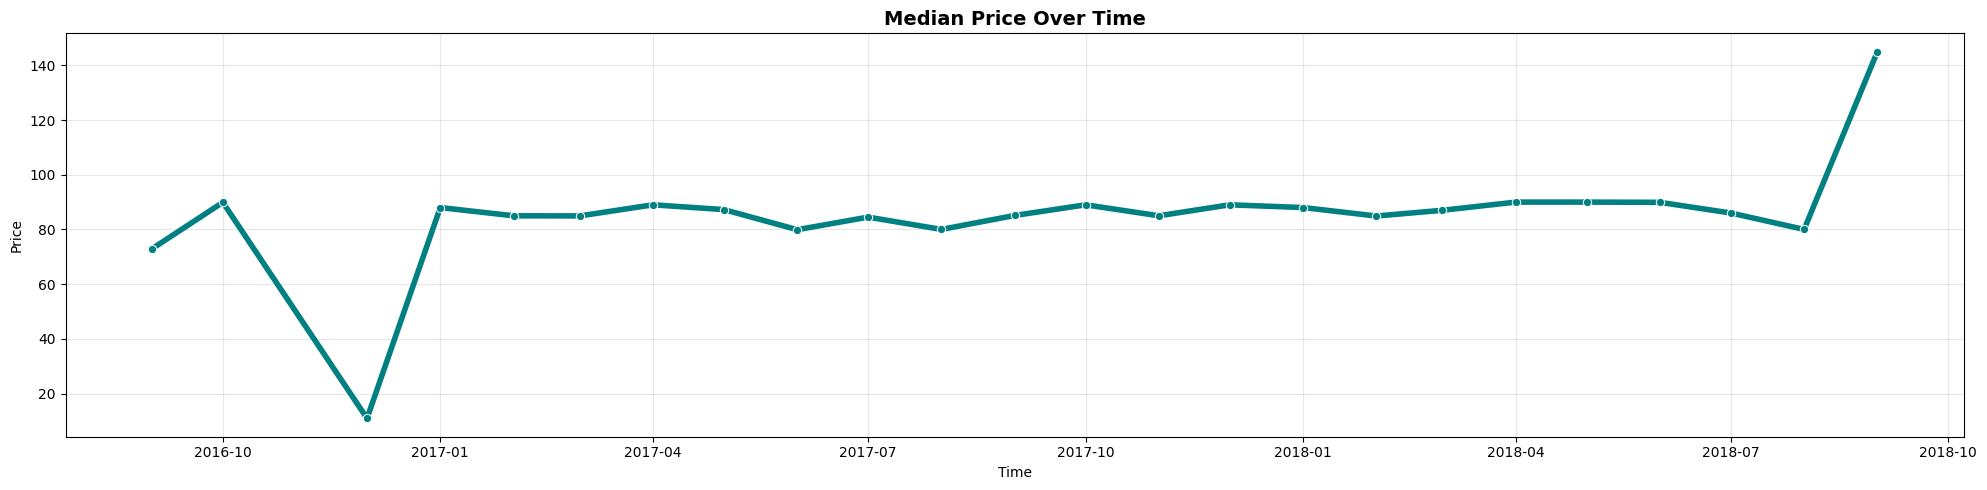

In [96]:
median_price_overtime=data.groupby(data['purchase_date'].dt.to_period("M"))['price'].median().reset_index()
median_price_overtime['purchase_date']=median_price_overtime['purchase_date'].dt.to_timestamp()
plt.figure(figsize=(20,5))
sns.lineplot(x='purchase_date',y='price',data=median_price_overtime,marker="o",linewidth=4,color='teal')
plt.grid(alpha=0.3)
plt.xlabel("Time")
plt.ylabel("Price")
plt.title("Median Price Over Time", fontsize=14,weight='bold')
plt.tight_layout()
plt.show()

`After a sudden drop at first, and sudden peak at last, the median price is in same range over the time`

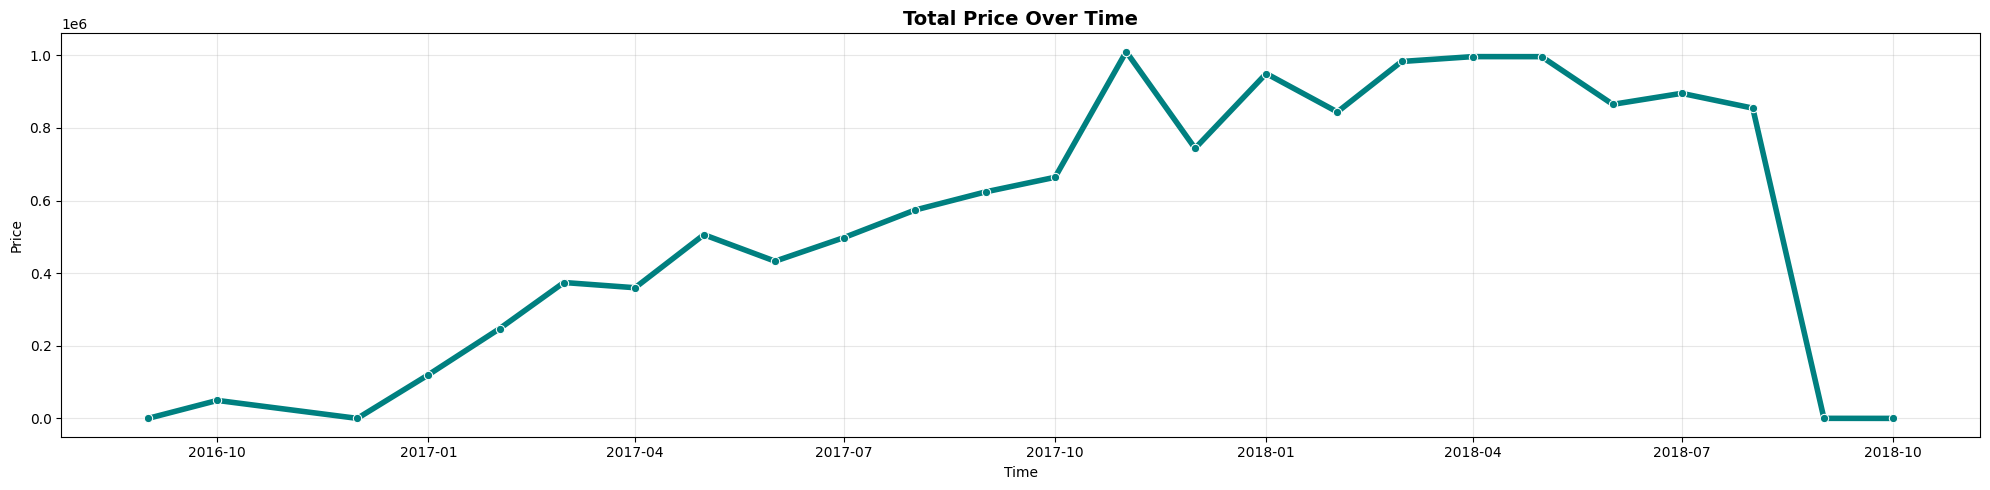

In [97]:
total_price_overtime=data.groupby(data['purchase_date'].dt.to_period("M"))['price'].sum().reset_index()
total_price_overtime['purchase_date']=total_price_overtime['purchase_date'].dt.to_timestamp()
plt.figure(figsize=(20,5))
sns.lineplot(x='purchase_date',y='price',data=total_price_overtime,marker="o",linewidth=4,color='teal')
plt.grid(alpha=0.3)
plt.xlabel("Time")
plt.ylabel("Price")
plt.title("Total Price Over Time", fontsize=14,weight='bold')
plt.tight_layout()
plt.show()

`Total Price in orders are increasing over the time`

**Are orders increasing over time?**

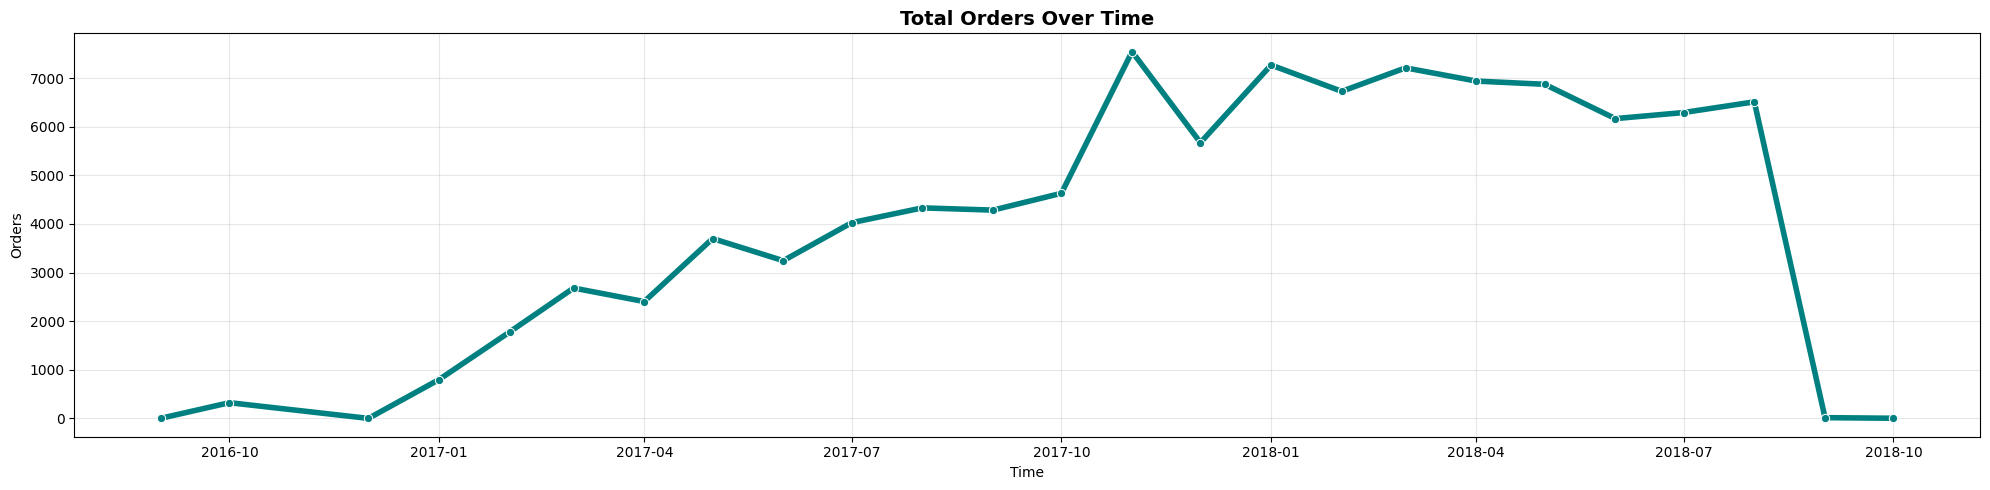

In [98]:
total_orders_overtime=data.groupby(data['purchase_date'].dt.to_period("M"))['order_id'].size().reset_index()
total_orders_overtime['purchase_date']=total_orders_overtime['purchase_date'].dt.to_timestamp()
plt.figure(figsize=(20,5))
sns.lineplot(x='purchase_date',y='order_id',data=total_orders_overtime,marker="o",linewidth=4,color='teal')
plt.grid(alpha=0.3)
plt.xlabel("Time")
plt.ylabel("Orders")
plt.title("Total Orders Over Time", fontsize=14,weight='bold')
plt.tight_layout()
plt.show()

`Total orders are increasing over time`

**What is the pattern in cancellation over time**

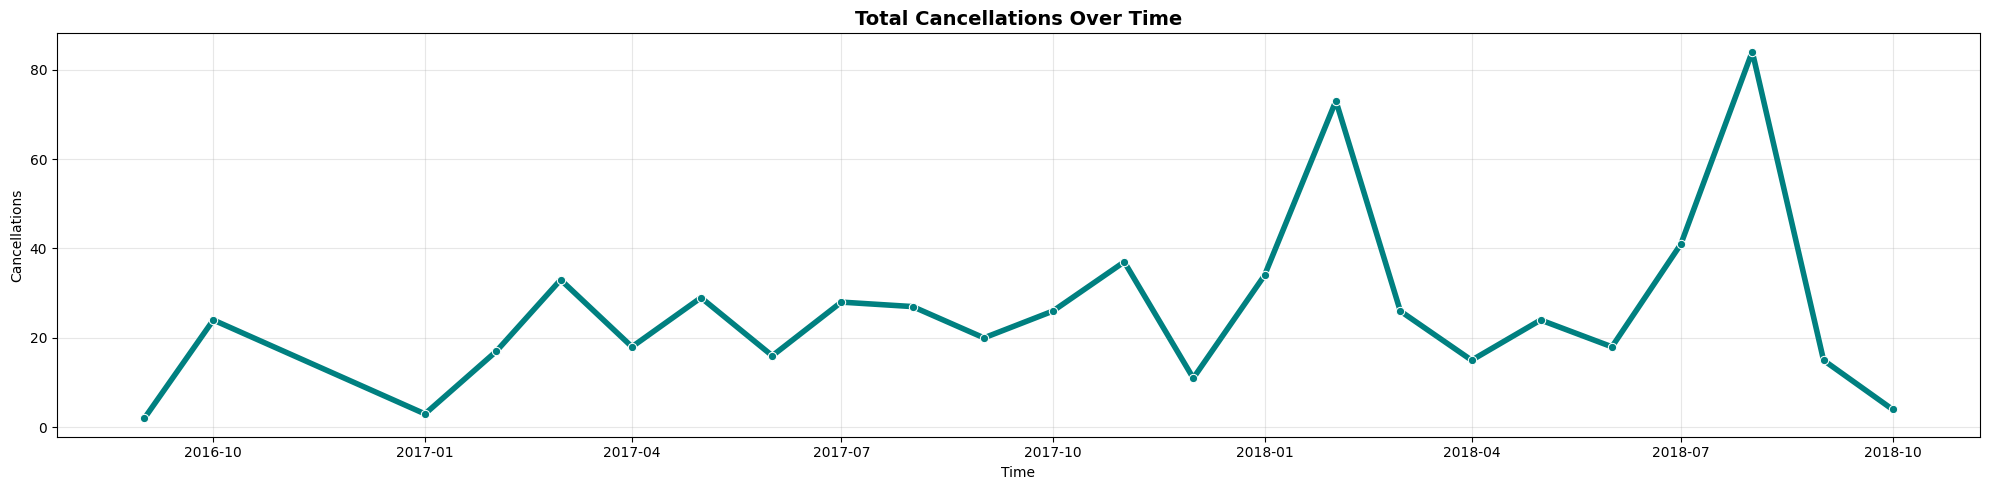

In [99]:
cancellation_over_time=data[data['status']=='canceled'].groupby(data['purchase_date'].dt.to_period("M"))['order_id'].size().reset_index()
cancellation_over_time['purchase_date']=cancellation_over_time['purchase_date'].dt.to_timestamp()
plt.figure(figsize=(20,5))
sns.lineplot(x='purchase_date',y='order_id',data=cancellation_over_time,marker="o",linewidth=4,color='teal')
plt.grid(alpha=0.3)
plt.xlabel("Time")
plt.ylabel("Cancellations")
plt.title("Total Cancellations Over Time", fontsize=14,weight='bold')
plt.tight_layout()
plt.show()

`There is no such pattern in cancellation over time`

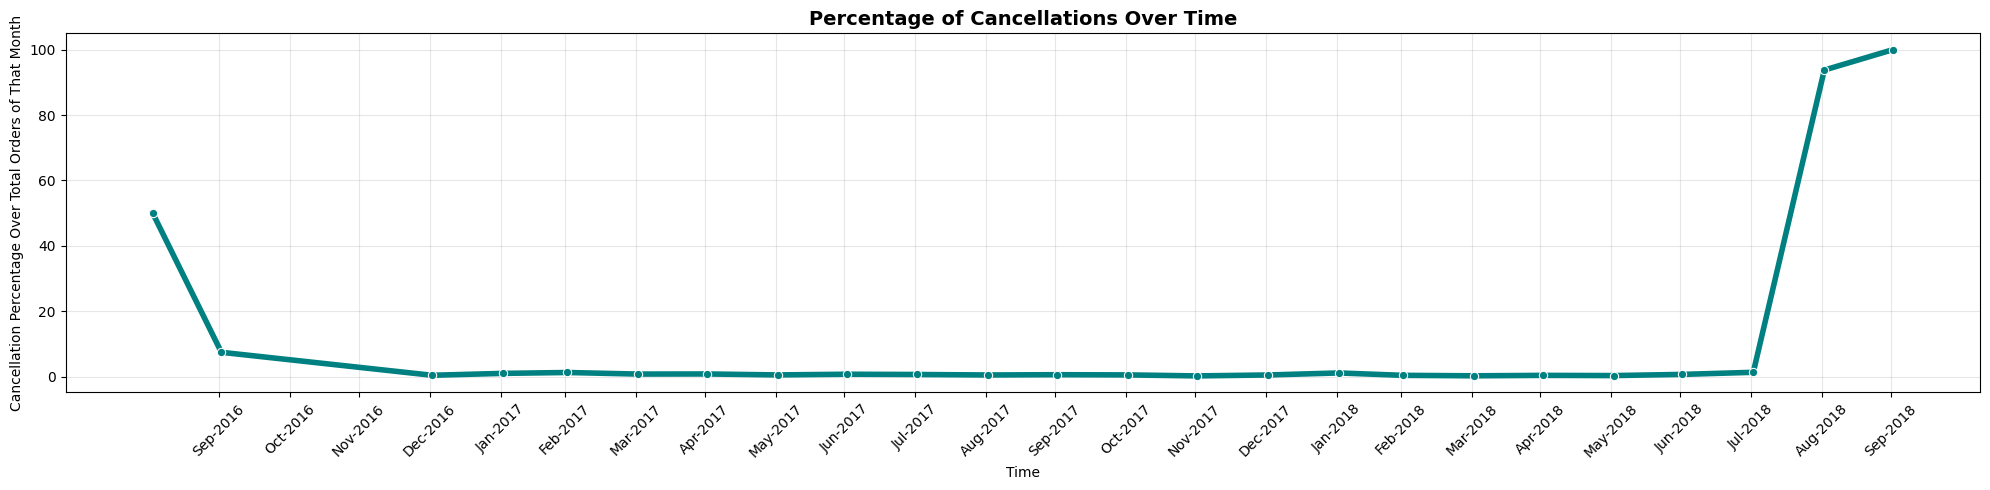

In [100]:
cancel_percent_over_time=cancellation_over_time.merge(total_orders_overtime,on='purchase_date',how='left')\
    .rename(columns={'order_id_x':'cancelled_items',"order_id_y":"total_items"})
cancel_percent_over_time['percent']=((cancel_percent_over_time['cancelled_items']/cancel_percent_over_time['total_items'])*100).round(2)
plt.figure(figsize=(20,5))
sns.lineplot(x='purchase_date',y='percent',data=cancel_percent_over_time,marker="o",linewidth=4,color='teal')
plt.grid(alpha=0.3)
ticks=pd.date_range(cancel_percent_over_time['purchase_date'].min(),cancel_percent_over_time['purchase_date'].max(),freq='1M')
plt.xticks(ticks, labels=ticks.strftime("%b-%Y"),rotation=45)
plt.xlabel("Time")
plt.ylabel("Cancellation Percentage Over Total Orders of That Month")
plt.title("Percentage of Cancellations Over Time", fontsize=14,weight='bold')
plt.tight_layout()
plt.show()

`There is sudden high percent of cancellation at the last`

**Are customer increasing in numbers?**

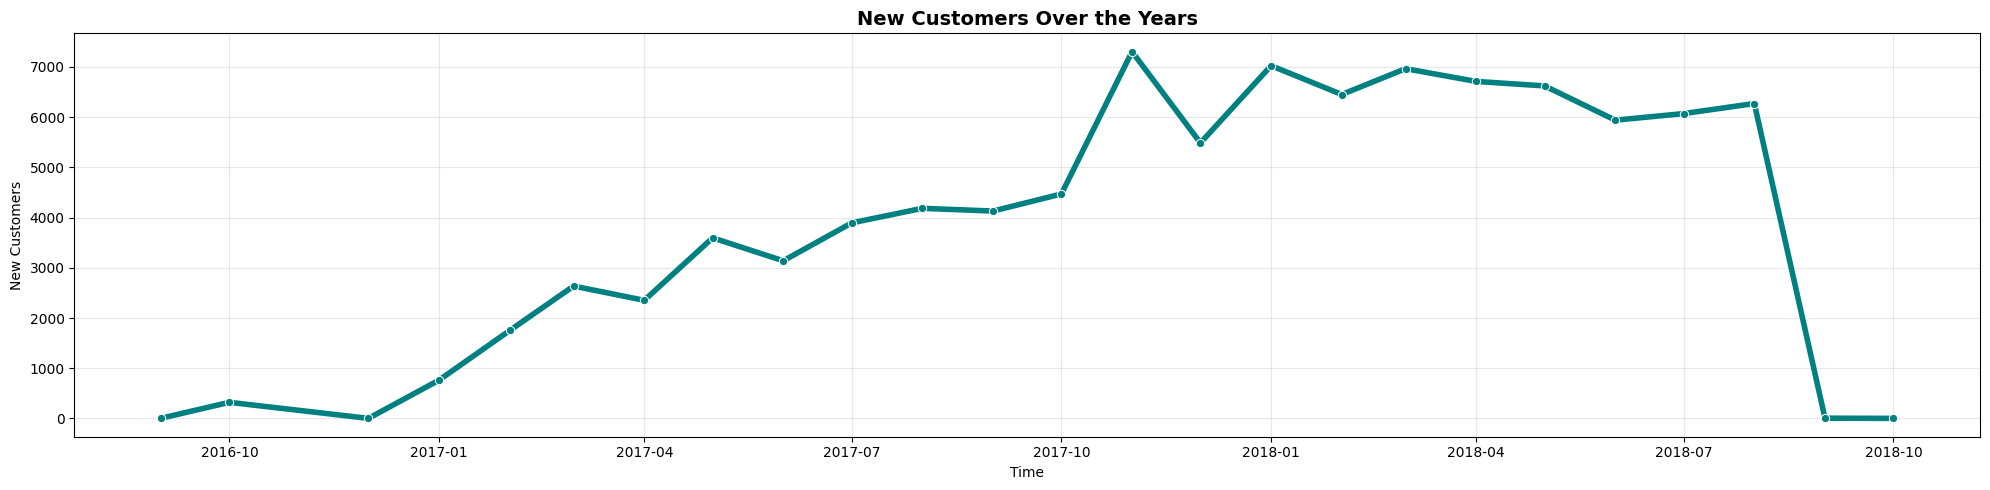

In [101]:
first_purchase_customer=data.groupby('customer_id')['purchase_date'].min().dt.to_period("M").reset_index()
new_customers=first_purchase_customer.groupby('purchase_date').size().reset_index(name='new_customers')
new_customers['purchase_date']=new_customers['purchase_date'].dt.to_timestamp()
plt.figure(figsize=(20,5))
sns.lineplot(x='purchase_date',y='new_customers',data=new_customers,marker="o",linewidth=4,color='teal')
plt.grid(alpha=0.3)
plt.xlabel("Time")
plt.ylabel("New Customers")
plt.title("New Customers Over the Years", fontsize=14,weight='bold')
plt.tight_layout()
plt.show()


`Number of customers are increasing over the years`

**Is delivery time changing over the years?**

In [102]:
data['delivery_time']=(data['delivered_customer_date']-data['purchase_date']).dt.days

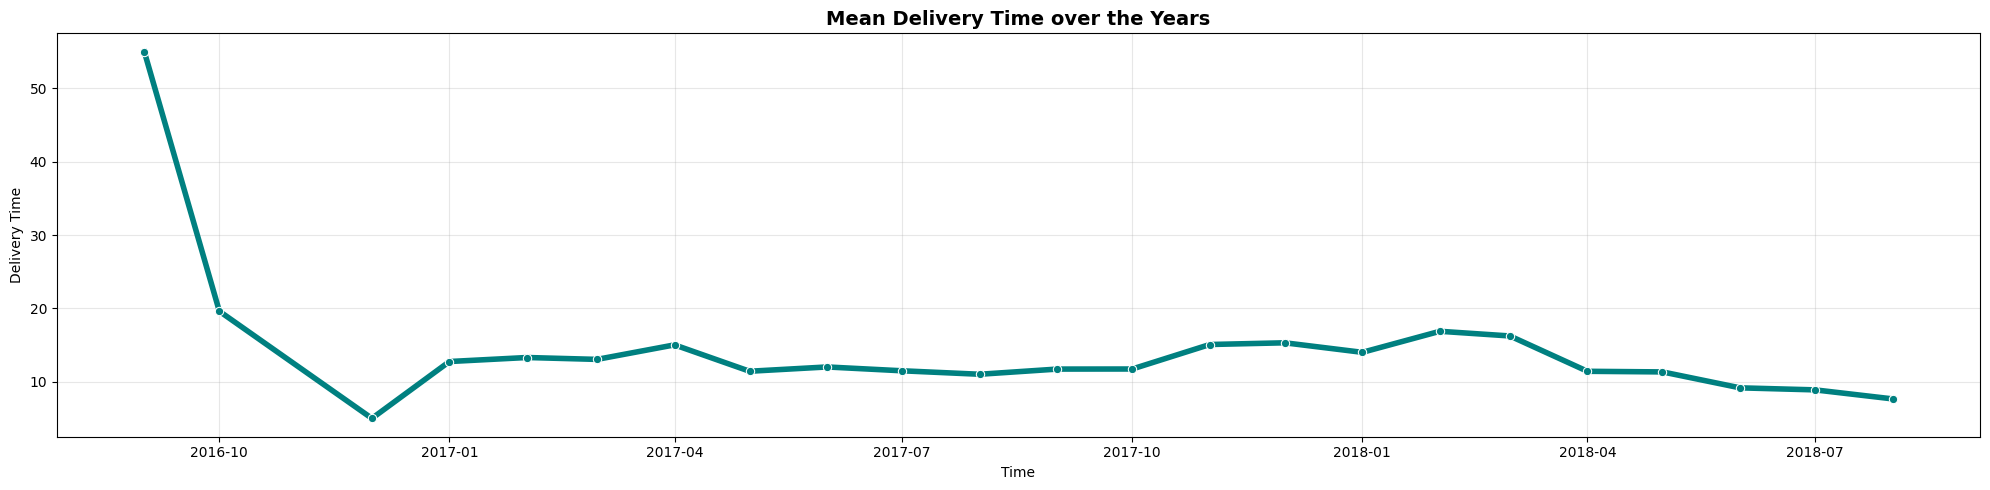

In [103]:
mean_delivery_time_over_years=data.groupby(data['purchase_date'].dt.to_period("M"))['delivery_time'].mean().reset_index()
mean_delivery_time_over_years['purchase_date']=mean_delivery_time_over_years['purchase_date'].dt.to_timestamp()
plt.figure(figsize=(20,5))
sns.lineplot(x='purchase_date',y='delivery_time',data=mean_delivery_time_over_years,marker="o",linewidth=4,color='teal')
plt.grid(alpha=0.3)
plt.xlabel("Time")
plt.ylabel("Delivery Time")
plt.title("Mean Delivery Time over the Years", fontsize=14,weight='bold')
plt.tight_layout()
plt.show()

`Delivery time have reduced from the first, and also there is a slight improvement at the last`

**Is business expanding by city?**

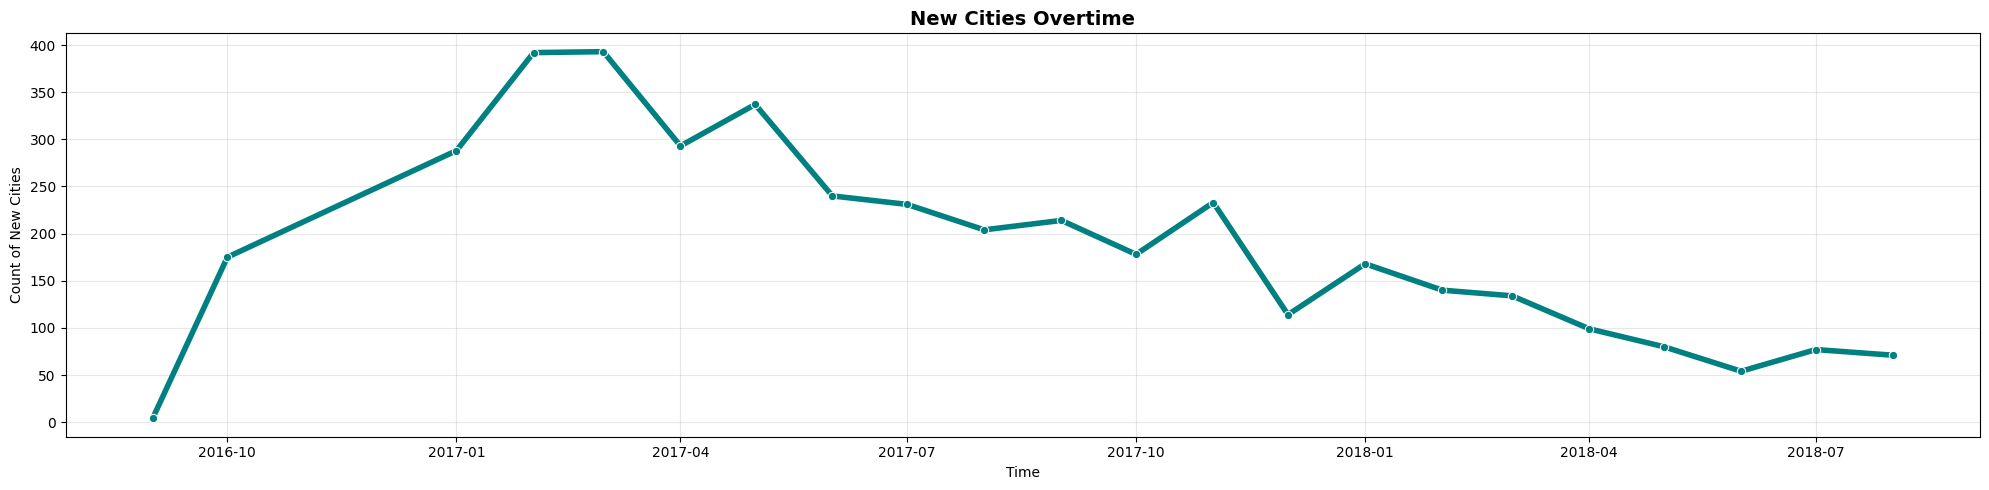

In [104]:
first_city_month=(data.groupby('customer_city')['purchase_date'].min().dt.to_period("M").reset_index(name='first_month'))
new_cities_overtime=first_city_month.groupby('first_month').size().reset_index(name='cities')
new_cities_overtime['first_month']=new_cities_overtime['first_month'].dt.to_timestamp()
plt.figure(figsize=(20,5))
sns.lineplot(x='first_month',y='cities',data=new_cities_overtime,marker="o",linewidth=4,color='teal')
plt.grid(alpha=0.3)
plt.xlabel("Time")
plt.ylabel("Count of New Cities")
plt.title("New Cities Overtime", fontsize=14,weight='bold')
plt.tight_layout()
plt.show()

`New Cities are still adding`

**Is freight value changing over time?**

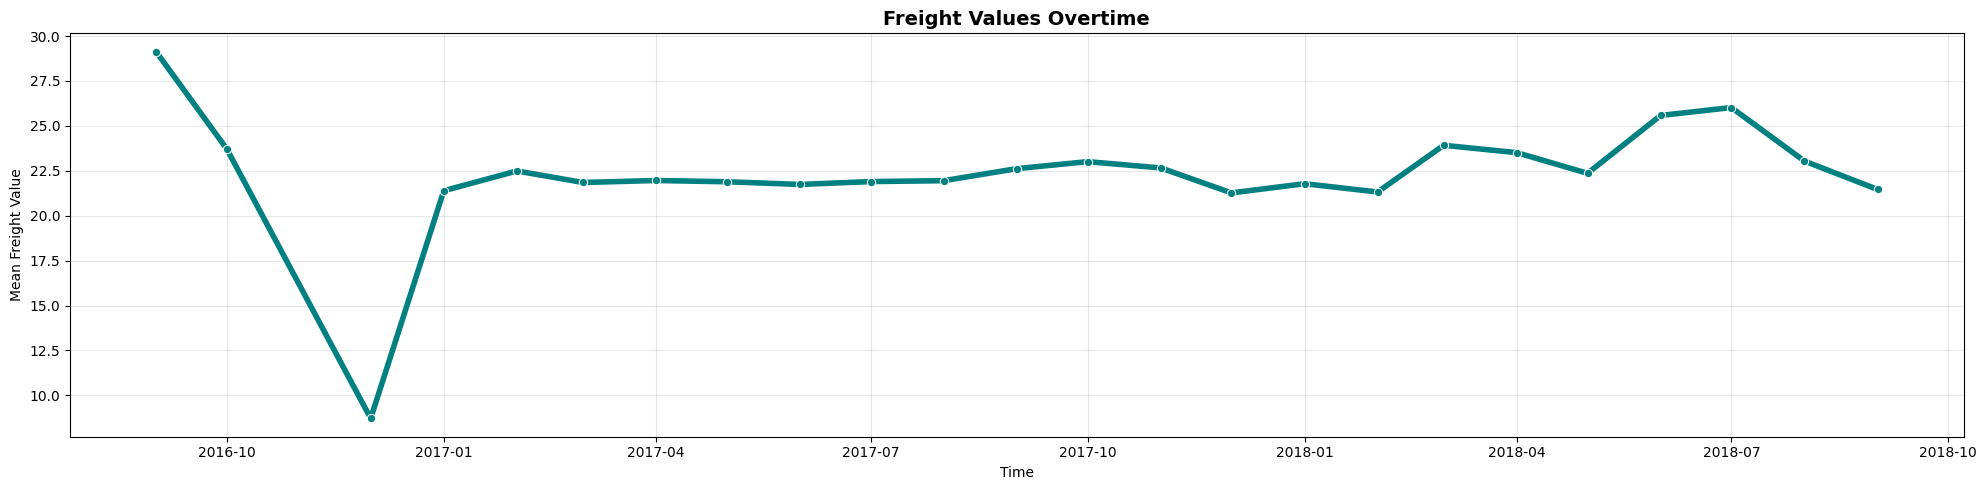

In [105]:
average_freight_overtime=data.groupby(data['purchase_date'].dt.to_period("M"))['freight_value'].mean().round(2).reset_index()
plt.figure(figsize=(20,5))
average_freight_overtime['purchase_date']=average_freight_overtime['purchase_date'].dt.to_timestamp()
sns.lineplot(x='purchase_date',y='freight_value',data=average_freight_overtime,marker="o",linewidth=4,color='teal')
plt.grid(alpha=0.3)
plt.xlabel("Time")
plt.ylabel("Mean Freight Value")
plt.title("Freight Values Overtime", fontsize=14,weight='bold')
plt.tight_layout()
plt.show()

`After a sudden drop in freight value, value remains kind of same...but value is changing at the last`

**Which time of the year have the most median sales?**

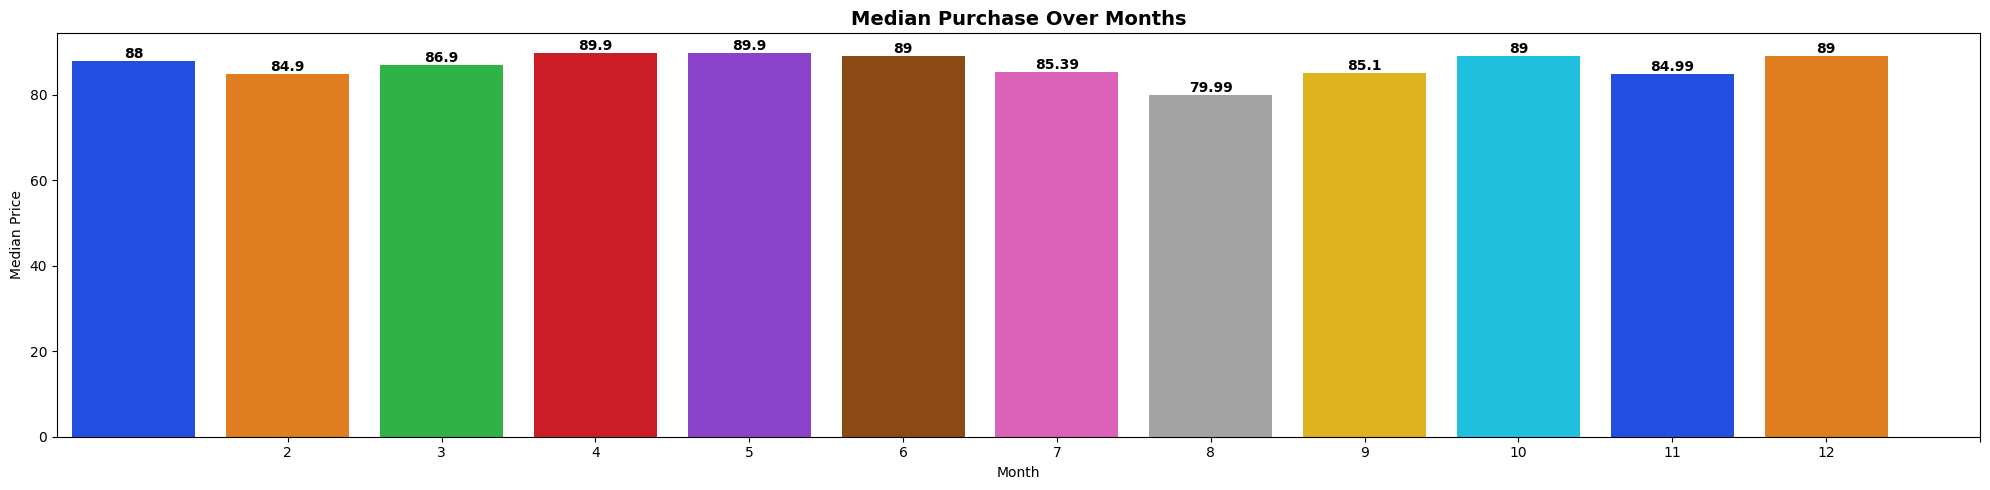

In [106]:
median_price_over_month=data.groupby(data['purchase_date'].dt.month)['price'].median().reset_index()
plt.figure(figsize=(20,5))
ax=sns.barplot(x='purchase_date',y='price',data=median_price_over_month,palette='bright')
for container in ax.containers:
    ax.bar_label(container,weight='bold')
plt.xlabel("Month")
plt.xticks(np.linspace(1,12,12))
plt.ylabel("Median Price")
plt.title("Median Purchase Over Months", fontsize=14,weight='bold')
plt.tight_layout()
plt.show()

` median Purchase amount is same through out the year`

**Which week days have the most median sales?**

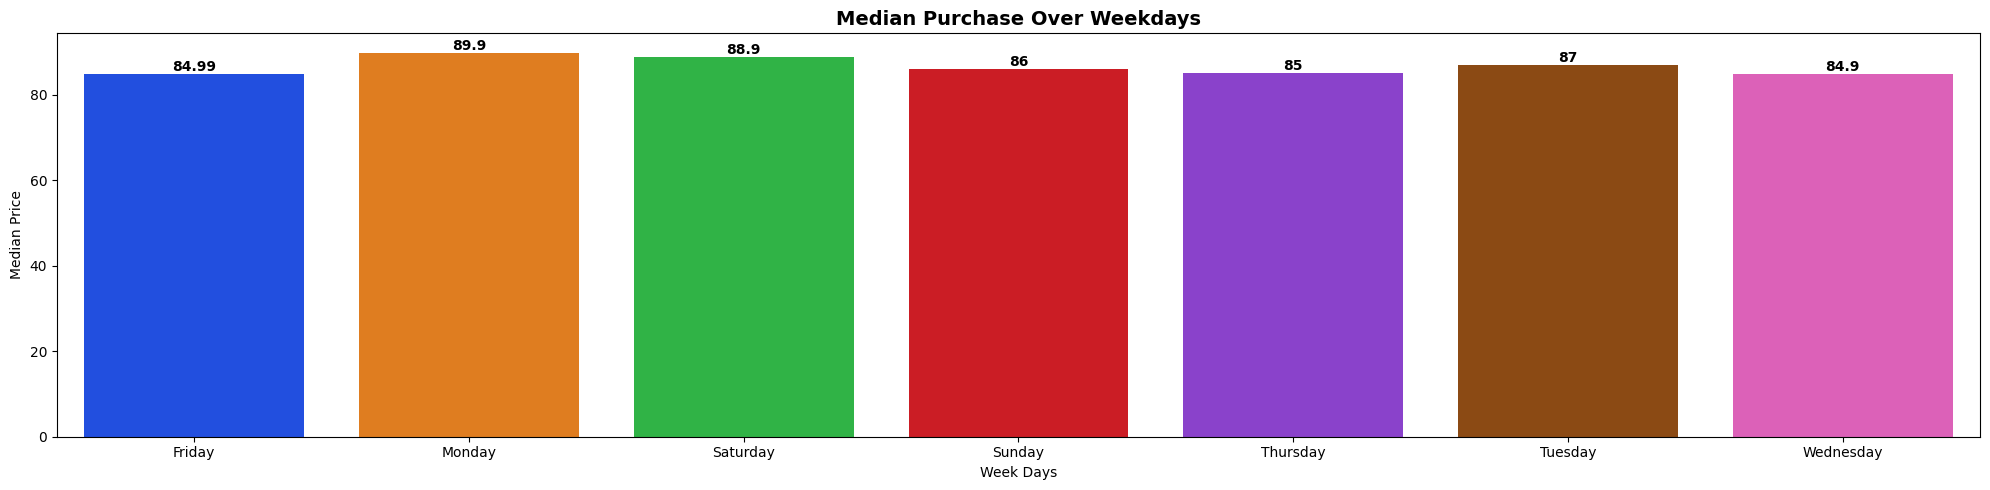

In [107]:
median_price_over_weekdays=data.groupby(data['purchase_date'].dt.day_name())['price'].median().reset_index()
plt.figure(figsize=(20,5))
ax=sns.barplot(x='purchase_date',y='price',data=median_price_over_weekdays,palette='bright')
for container in ax.containers:
    ax.bar_label(container,weight='bold')
plt.xlabel("Week Days")
plt.xticks(np.linspace(0,6,7))
plt.ylabel("Median Price")
plt.title("Median Purchase Over Weekdays", fontsize=14,weight='bold')
plt.tight_layout()
plt.show()

`There is no such pattern in difference in sales in weekdays`

**Is seller incrasing?**

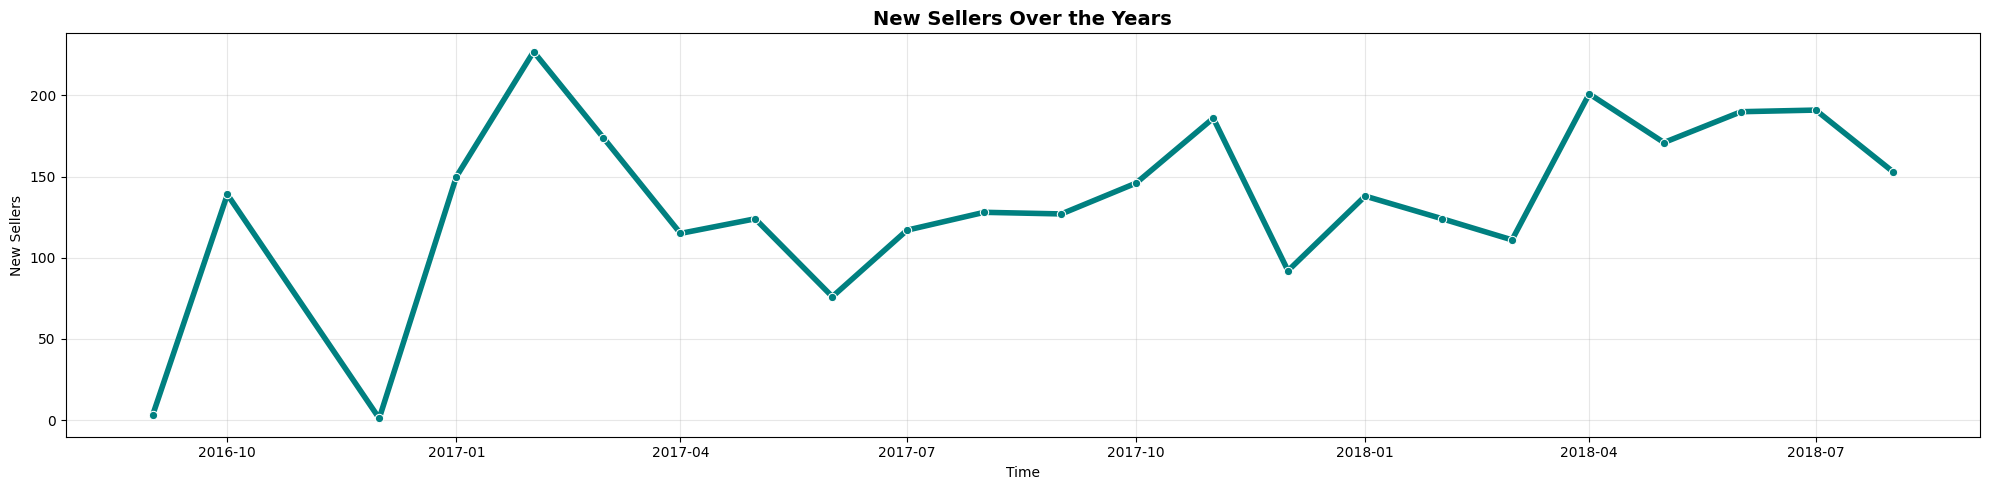

In [108]:
first_purchase_seller=data.groupby('seller_id')['purchase_date'].min().dt.to_period("M").reset_index()
new_sellers=first_purchase_seller.groupby('purchase_date').size().reset_index(name='new_sellers')
new_sellers['purchase_date']=new_sellers['purchase_date'].dt.to_timestamp()
plt.figure(figsize=(20,5))
sns.lineplot(x='purchase_date',y='new_sellers',data=new_sellers,marker="o",linewidth=4,color='teal')
plt.grid(alpha=0.3)
plt.xlabel("Time")
plt.ylabel("New Sellers")
plt.title("New Sellers Over the Years", fontsize=14,weight='bold')
plt.tight_layout()
plt.show()


`Seller are still increasing`

**Do purchases varies with days of months?**

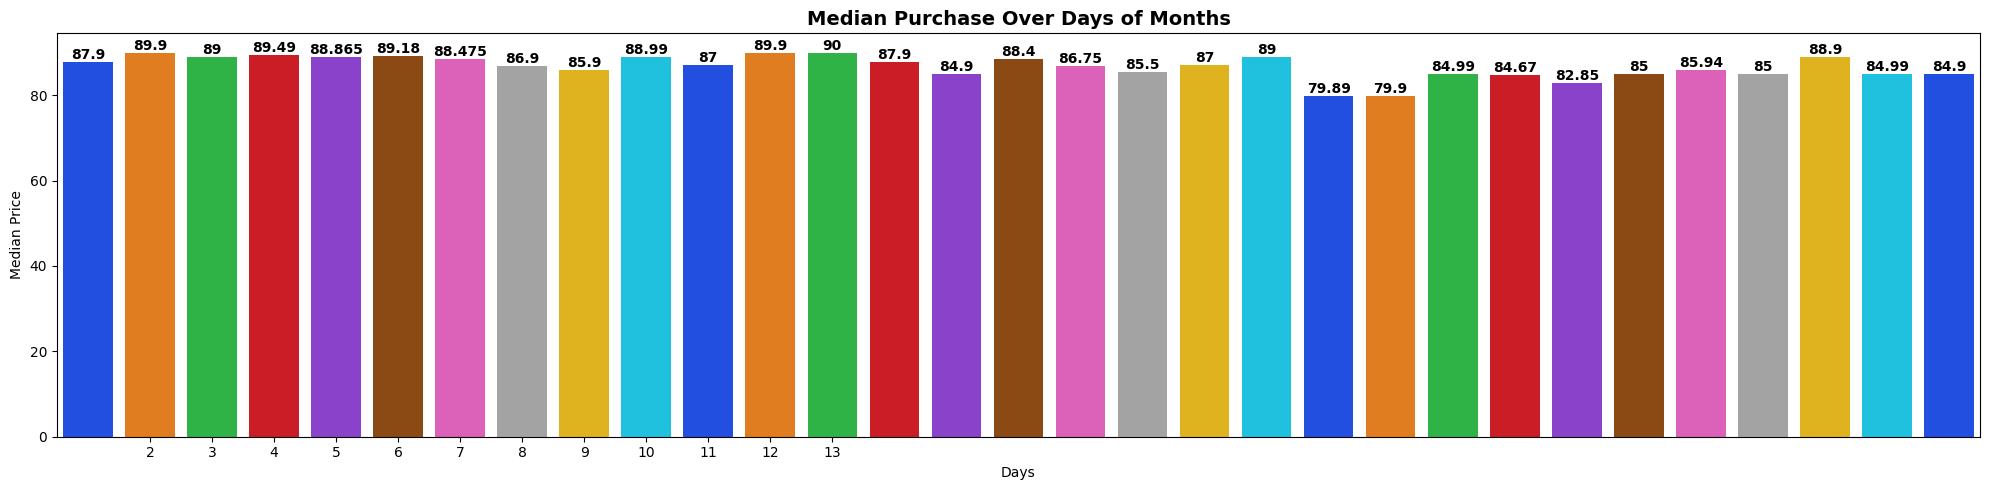

In [109]:
median_price_over_days=data.groupby(data['purchase_date'].dt.day)['price'].median().reset_index()
plt.figure(figsize=(20,5))
ax=sns.barplot(x='purchase_date',y='price',data=median_price_over_days,palette='bright')
for container in ax.containers:
    ax.bar_label(container,weight='bold')
plt.xlabel("Days")
plt.xticks(np.linspace(1,12,12))
plt.ylabel("Median Price")
plt.title("Median Purchase Over Days of Months", fontsize=14,weight='bold')
plt.tight_layout()
plt.show()

`There is not a specif pattern`

### Categorical to Categorical Analysis

In [110]:
data[categorical_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   status                   99441 non-null  object
 1   order_item_id            99441 non-null  object
 2   product_id               98666 non-null  object
 3   payment_sequential       99441 non-null  object
 4   payment_type             99440 non-null  object
 5   payment_installments     99441 non-null  object
 6   product_category         97226 non-null  object
 7   purchase_time            99441 non-null  object
 8   approve_time             99441 non-null  object
 9   delivered_carrier_time   99441 non-null  object
 10  delivered_customer_time  99441 non-null  object
dtypes: object(11)
memory usage: 8.3+ MB


**Is a specific category is cancelled more?**

In [111]:
total_products_ordered=data.groupby(data['product_category']).size().reset_index()
canceled_product_cat=data[data['status']=='canceled'].groupby('product_category').size().sort_values().reset_index()
canceled_product_cat=canceled_product_cat.merge(total_products_ordered,on='product_category',how='left').rename(columns={'0_x':'cancelled','0_y':'total'})
canceled_product_cat['percent']=((canceled_product_cat['cancelled']/canceled_product_cat['total'])*100).round(2)
canceled_product_cat.sort_values(by='percent',ascending=False).head(10)

,product_category,cancelled,total,percent
4,diapers_and_hygiene,1,27,3.70
17,dvds_blu_ray,2,58,3.45
21,fixed_telephony,3,215,1.40
27,books_general_interest,7,510,1.37
22,home_appliances_2,3,234,1.28
29,small_appliances,8,626,1.28
28,musical_instruments,8,624,1.28
13,construction_tools_safety,2,163,1.23
12,costruction_tools_garden,2,191,1.05
6,fashion_male_clothing,1,111,0.90


`As we can see, diapers_and_hygene and dvds_blu_ray have a higher chance of cancellation among others`

`Whereas office_furniture have the lowest chance of cancellation`

**Is there any category using installment payment most?**

In [112]:
data.groupby(data['product_category'])['payment_installments'].agg(lambda x: x.value_counts().idxmax()).reset_index().sort_values(by='payment_installments',ascending=False)

,product_category,payment_installments
64,small_appliances_home_oven_and_coffee,10.0
0,agro_industry_and_commerce,1.0
45,home_appliances_2,1.0
51,kitchen_dining_laundry_garden_furniture,1.0
50,industry_commerce_and_business,1.0
...,...,...
23,diapers_and_hygiene,1.0
22,costruction_tools_tools,1.0
21,costruction_tools_garden,1.0
20,cool_stuff,1.0


`There is not a specific category which use installments more`

In [113]:
data[data['status']=='canceled']['order_item_id'].value_counts()

order_item_id
1.0    420
nan    164
2.0     26
5.0      7
3.0      3
6.0      3
4.0      2
Name: count, dtype: int64

`We can assume that product with higher order item id is more likely not to cancel`

**What is the most purchased product at each time?**

In [114]:
data.groupby(data['purchase_time'])['product_category'].agg(lambda x: x.value_counts().idxmax()).reset_index()

,purchase_time,product_category
0,afternoon,bed_bath_table
1,early morning,health_beauty
2,evening,bed_bath_table
3,midnight,bed_bath_table
4,morning,bed_bath_table
5,night,bed_bath_table


`bed bath table is the most purchased category but health_beuty is most purchased at early morning`

**What is the most purchased product at night?**

In [121]:
data[data['purchase_time']=='midnight']['product_category'].value_counts().reset_index().head(10)

,product_category,count
0,bed_bath_table,458
1,health_beauty,396
2,sports_leisure,363
3,furniture_decor,326
4,watches_gifts,324
5,telephony,250
6,computers_accessories,238
7,housewares,230
8,toys,177
9,garden_tools,156


**Is there any product that is orderd only at midnight?**

In [116]:
products_bought_only_at_night=data[data['purchase_time']=='midnight']['product_category'].value_counts().reset_index()['product_category'].tolist()

In [117]:
products_boutght_not_at_night=data[data['purchase_time']!='midnight']['product_category'].value_counts().reset_index()['product_category'].tolist()

In [118]:
set(products_bought_only_at_night)-set(products_bought_only_at_night)

set()

`There is no product which is brought only at midnight`

**Do order with high order items deliver at different time?**

In [119]:
data['order_item_id']=data['order_item_id'].astype(float)

In [124]:
data[data['order_item_id']>9]['delivered_customer_time'].value_counts()

delivered_customer_time
evening      11
afternoon     5
night         5
morning       4
Name: count, dtype: int64

`Most of the higher order item orders are delivered at evening`

**Any product category have specific payment type?**

In [132]:
data.groupby(data['product_category'])['payment_type'].agg(lambda x: x.value_counts().idxmax()).reset_index()

,product_category,payment_type
0,agro_industry_and_commerce,credit_card
1,air_conditioning,credit_card
2,art,credit_card
3,arts_and_craftmanship,credit_card
4,audio,credit_card
...,...,...
66,stationery,credit_card
67,tablets_printing_image,credit_card
68,telephony,credit_card
69,toys,credit_card


`There is no change in most used payment types accross different product categories`

**Which product categories are bought the most with each payment method?**

In [143]:
payment_methods_used=data.groupby('payment_type').size().reset_index(name='total')
payment_methods_used

,payment_type,total
0,boleto,19784
1,credit_card,75233
2,debit_card,1528
3,not_defined,3
4,voucher,2892


In [146]:
payment_type_category=data.groupby(data['payment_type'])['product_category'].value_counts().groupby(level=0).head(1).reset_index()
payment_type_category=payment_type_category.merge(payment_methods_used,on='payment_type',how='left')
payment_type_category['percent']=((payment_type_category['count']/payment_type_category['total'])*100).round(2)
payment_type_category

,payment_type,product_category,count,total,percent
0,boleto,computers_accessories,1715,19784,8.67
1,credit_card,bed_bath_table,7309,75233,9.72
2,debit_card,health_beauty,146,1528,9.55
3,voucher,bed_bath_table,306,2892,10.58


`Three different product category is bought the most using 4 payment methods`

**Do cancellation happen at any particular time most?**

In [173]:
total_orders_at_each_time=data['purchase_time'].value_counts().reset_index()
cancelled_orders=data[data['status']=='canceled'].groupby('purchase_time').size().reset_index(name='canceled')
cancelled_orders=cancelled_orders.merge(total_orders_at_each_time,on='purchase_time',how='left')
cancelled_orders['percent']=((cancelled_orders['canceled']/cancelled_orders['count'])*100).round(2)
cancelled_orders.sort_values(by='percent',ascending=False)

,purchase_time,canceled,count,percent
1,early morning,16,1921,0.83
4,morning,139,20507,0.68
3,midnight,30,4552,0.66
0,afternoon,165,25536,0.65
2,evening,151,24576,0.61
5,night,124,22349,0.55


`Products ordered in the early morning have the highest cancellation rate`

### Numerical to Numerical

In [174]:
data[numerical_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          98666 non-null  float64
 1   freight_value  98666 non-null  float64
 2   payment_value  99440 non-null  float64
dtypes: float64(3)
memory usage: 2.3 MB


**Is there any relationship between price and freight value?**

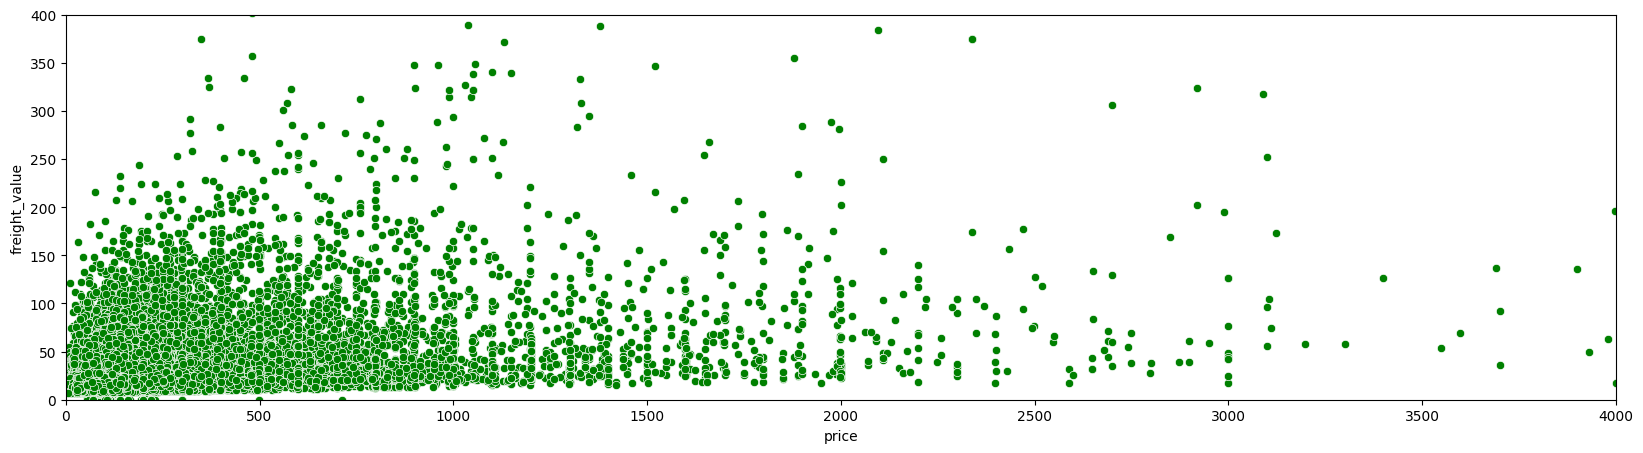

In [182]:
plt.figure(figsize=(20,5))
sns.scatterplot(x='price',y='freight_value',data=data,color='green')
plt.xlim(0,4000)
plt.ylim(0,400)
plt.show()

`There is no connection between freight value and price`

### Categorical to Numerical

In [183]:
data[categorical_columns+numerical_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   status                   99441 non-null  object 
 1   order_item_id            98666 non-null  float64
 2   product_id               98666 non-null  object 
 3   payment_sequential       99441 non-null  object 
 4   payment_type             99440 non-null  object 
 5   payment_installments     99441 non-null  object 
 6   product_category         97226 non-null  object 
 7   purchase_time            99441 non-null  object 
 8   approve_time             99441 non-null  object 
 9   delivered_carrier_time   99441 non-null  object 
 10  delivered_customer_time  99441 non-null  object 
 11  price                    98666 non-null  float64
 12  freight_value            98666 non-null  float64
 13  payment_value            99440 non-null  float64
dtypes: float64(4), object(

**Did medican price influenced cancellation?**

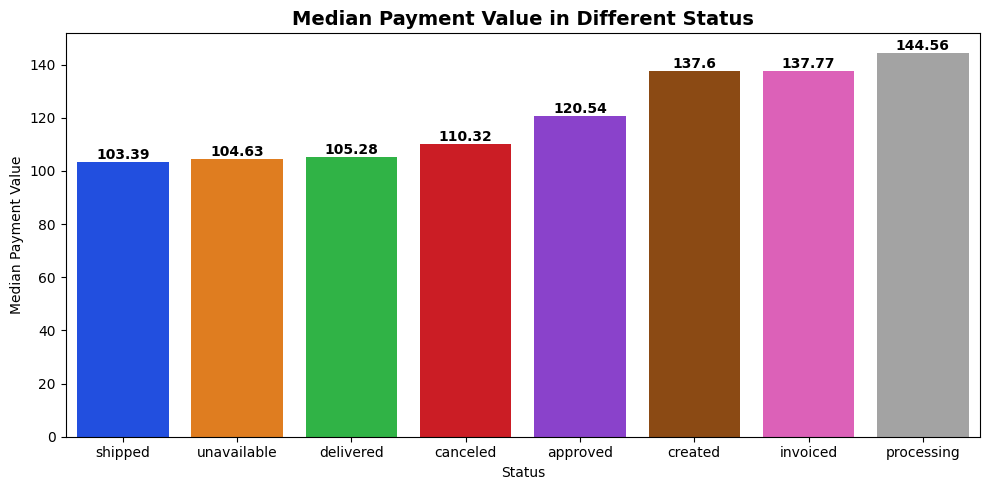

In [202]:
payment_value_with_status=data.groupby('status')['payment_value'].median().reset_index()
plt.figure(figsize=(10,5))
ax=sns.barplot(x='status',y='payment_value',data=payment_value_with_status,palette='bright',order=payment_value_with_status.sort_values(by='payment_value')['status'])
for container in ax.containers:
    ax.bar_label(container,weight='bold')
plt.xlabel("Status")
plt.ylabel("Median Payment Value")
plt.title("Median Payment Value in Different Status", fontsize=14,weight='bold')
plt.tight_layout()
plt.show()

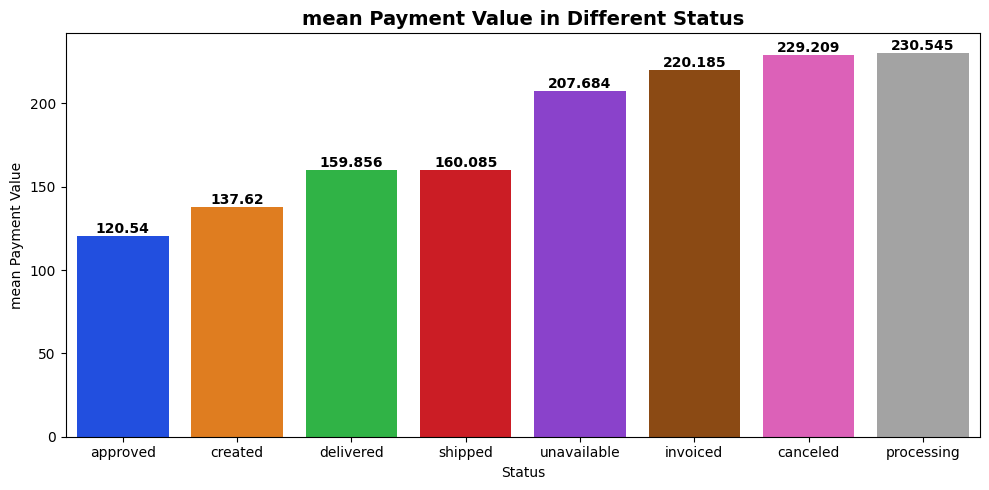

In [204]:
payment_value_with_status=data.groupby('status')['payment_value'].mean().reset_index()
plt.figure(figsize=(10,5))
ax=sns.barplot(x='status',y='payment_value',data=payment_value_with_status,palette='bright',order=payment_value_with_status.sort_values(by='payment_value')['status'])
for container in ax.containers:
    ax.bar_label(container,weight='bold')
plt.xlabel("Status")
plt.ylabel("mean Payment Value")
plt.title("mean Payment Value in Different Status", fontsize=14,weight='bold')
plt.tight_layout()
plt.show()

`Median Price is not so high for cancelled orders, but mean price is high...means there are some high valued orders which have been canceled`

**Was freight value the reason for calculation?**

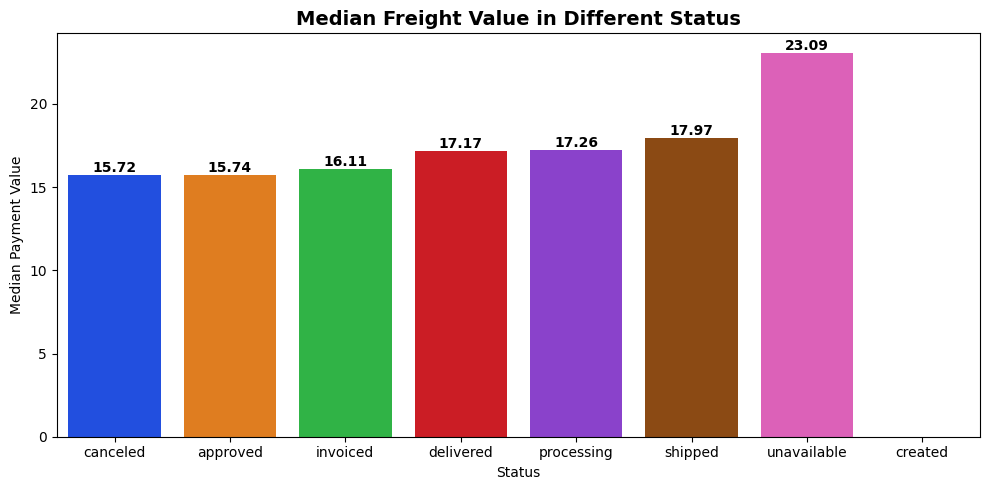

In [205]:
freight_value_with_status=data.groupby('status')['freight_value'].median().reset_index()
plt.figure(figsize=(10,5))
ax=sns.barplot(x='status',y='freight_value',data=freight_value_with_status,palette='bright',order=freight_value_with_status.sort_values(by='freight_value')['status'])
for container in ax.containers:
    ax.bar_label(container,weight='bold')
plt.xlabel("Status")
plt.ylabel("Median Payment Value")
plt.title("Median Freight Value in Different Status", fontsize=14,weight='bold')
plt.tight_layout()
plt.show()

`Canceled have the lowest median amount of freight`

**Higher Order Items means higher price?**

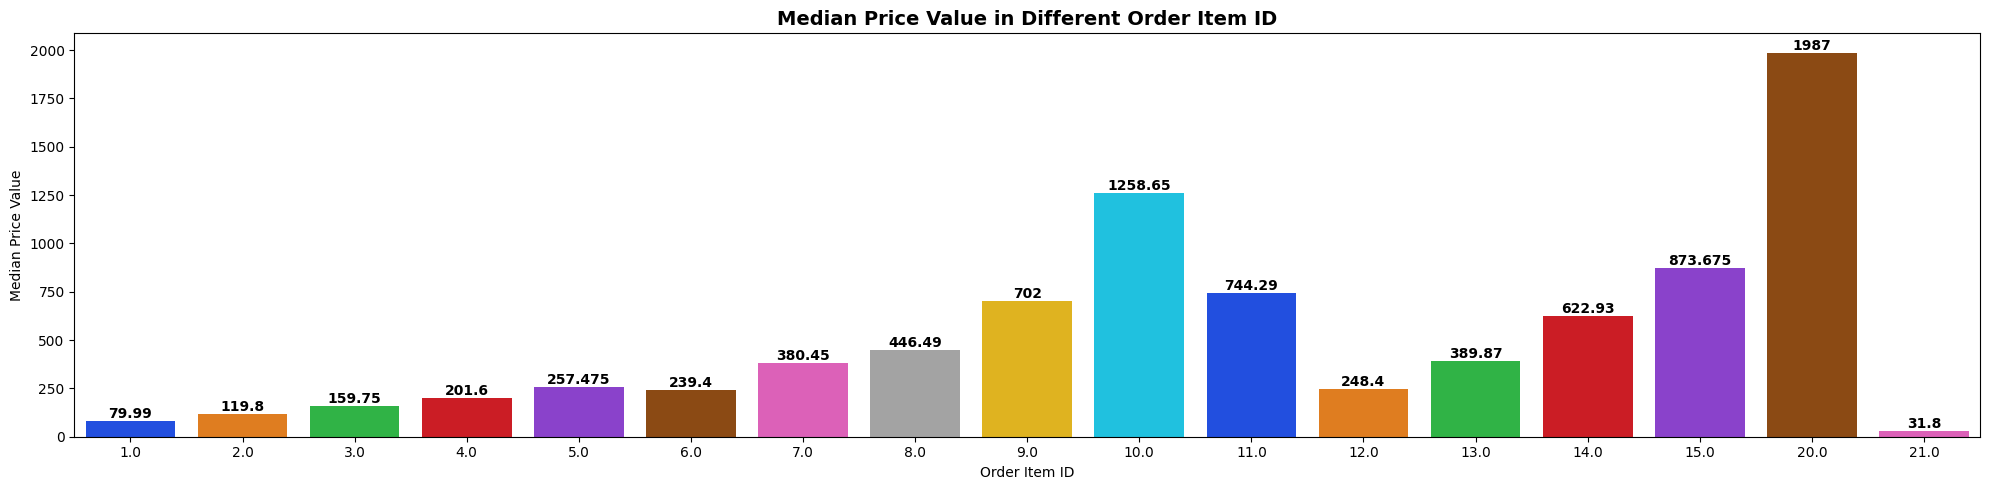

In [210]:
order_item_with_price=data.groupby(data['order_item_id'])['price'].median().reset_index()
plt.figure(figsize=(20,5))
ax=sns.barplot(x='order_item_id',y='price',data=order_item_with_price,palette='bright')
for container in ax.containers:
    ax.bar_label(container,weight='bold')
plt.xlabel("Order Item ID")
plt.ylabel("Median Price Value")
plt.title("Median Price Value in Different Order Item ID", fontsize=14,weight='bold')
plt.tight_layout()
plt.show()

`For more than 10 products per order, there is no gurantee of the price`

**Higher order item means higher freight?**

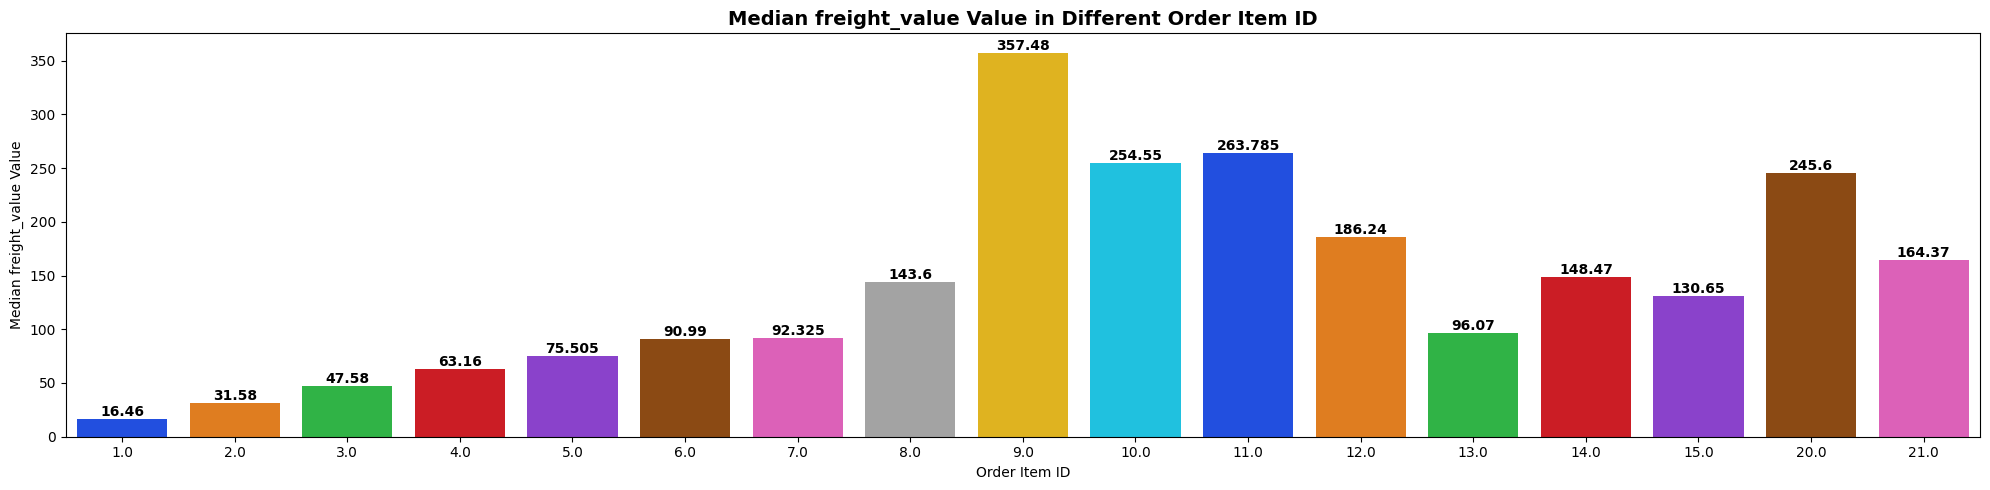

In [211]:
order_item_with_freight_value=data.groupby(data['order_item_id'])['freight_value'].median().reset_index()
plt.figure(figsize=(20,5))
ax=sns.barplot(x='order_item_id',y='freight_value',data=order_item_with_freight_value,palette='bright')
for container in ax.containers:
    ax.bar_label(container,weight='bold')
plt.xlabel("Order Item ID")
plt.ylabel("Median freight_value Value")
plt.title("Median freight_value Value in Different Order Item ID", fontsize=14,weight='bold')
plt.tight_layout()
plt.show()

`For order with more than 9 order items, freight value is not specific`

**People who used payment sequential have higher payment value?**

In [225]:
data['used_sequence_payment']=pd.DataFrame(data['payment_sequential'].astype(float).apply(lambda x: 1 if x>1 else 0)).rename(columns={'payment_sequential':"used_sequence"})

In [231]:
data.groupby(data['used_sequence_payment'])['payment_value'].mean().reset_index()

,used_sequence_payment,payment_value
0,0,161.078731
1,1,155.982034


In [234]:
from scipy.stats import levene,ttest_ind

used_seq=data[data['used_sequence_payment']==1]['payment_value'].dropna().sample(500)
not_used_seq=data[data['used_sequence_payment']==0]['payment_value'].dropna().sample(500)
levene_test=levene(used_seq,not_used_seq)
print(f"Levene’s p-value: {levene_test.pvalue:.5f}")
if levene_test.pvalue<0.05:
    print('Not equal variance')
else:
    print('Equal variance')

Levene’s p-value: 0.51460
Equal variance


In [235]:
stats,p=ttest_ind(np.array(used_seq),np.array(not_used_seq),equal_var=False)
print(f"p value is {p: .5f}")
if p<0.05:
    print('reject the null, there is difference')
else:
    print('accept the null, there is no difference')

p value is  0.38747
accept the null, there is no difference


`We can conclude that there is no difference in mean payment value in orders where sequential payment is used`

**Is payment type controller by payment value?**

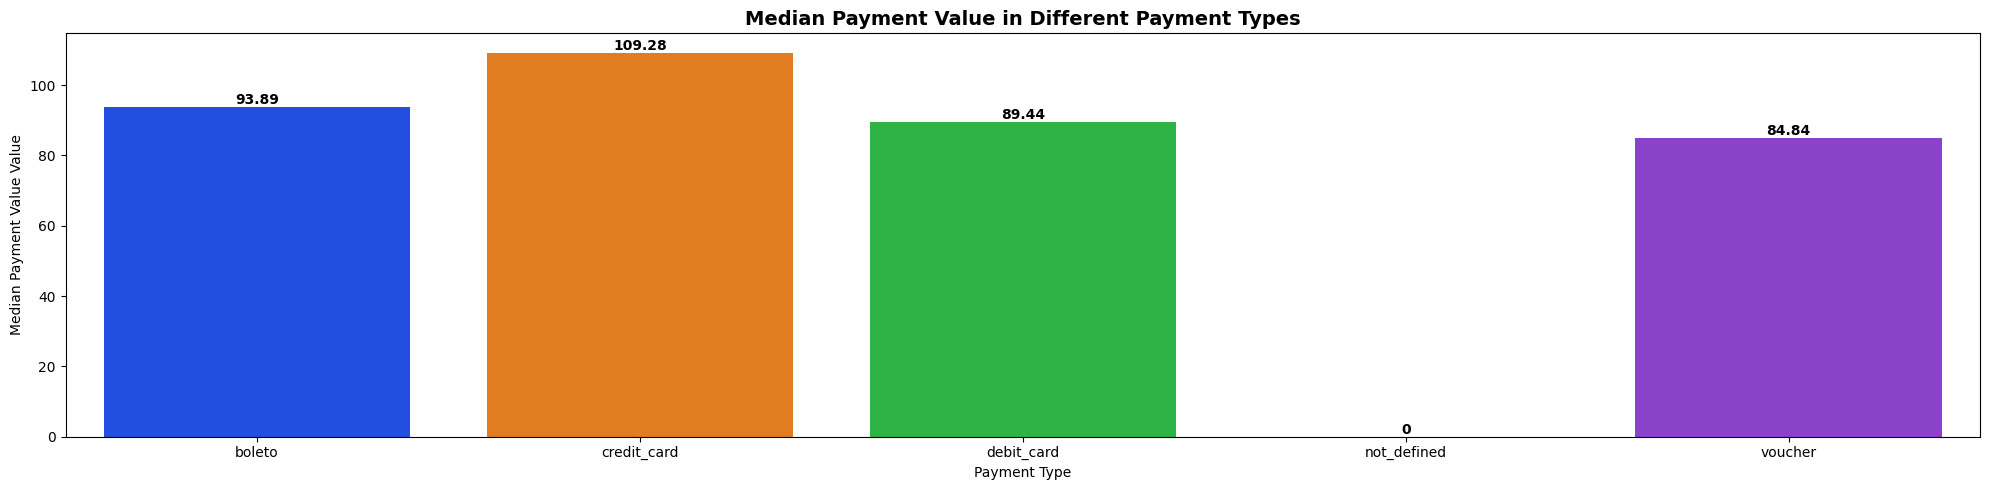

In [242]:
payment_type_with_payment_value=data.groupby('payment_type')['payment_value'].median().reset_index()
plt.figure(figsize=(20,5))
ax=sns.barplot(x='payment_type',y='payment_value',data=payment_type_with_payment_value,palette='bright')
for container in ax.containers:
    ax.bar_label(container,weight='bold')
plt.xlabel("Payment Type")
plt.ylabel("Median Payment Value Value")
plt.title("Median Payment Value in Different Payment Types", fontsize=14,weight='bold')
plt.tight_layout()
plt.show()

`Credit card have relatively higher median payment amount`

**Do time take to deliver influence the freight value?**

In [253]:
data['delivery_time'].value_counts().index

Index([  7.0,   8.0,   6.0,   9.0,  10.0,  11.0,   5.0,  12.0,  13.0,   4.0,
       ...
       130.0, 146.0, 125.0, 183.0, 172.0, 190.0, 103.0, 173.0,  87.0, 133.0],
      dtype='float64', name='delivery_time', length=144)

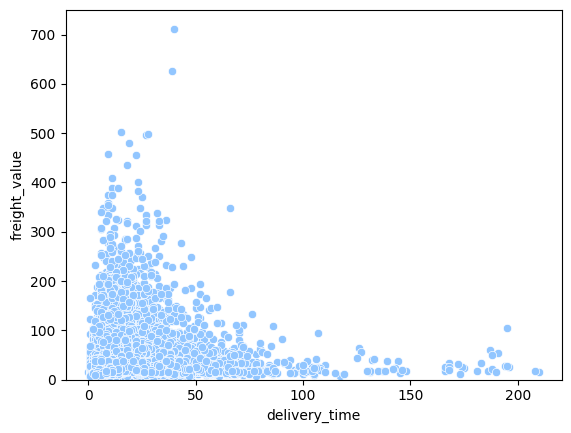

In [259]:
sns.scatterplot(x='delivery_time',y='freight_value',data=data)
plt.ylim(0,750)
plt.show()

`Higher delivery time have lower freight value compared to lower delivery time`

**Does high valued orders mostly delivered at day?**

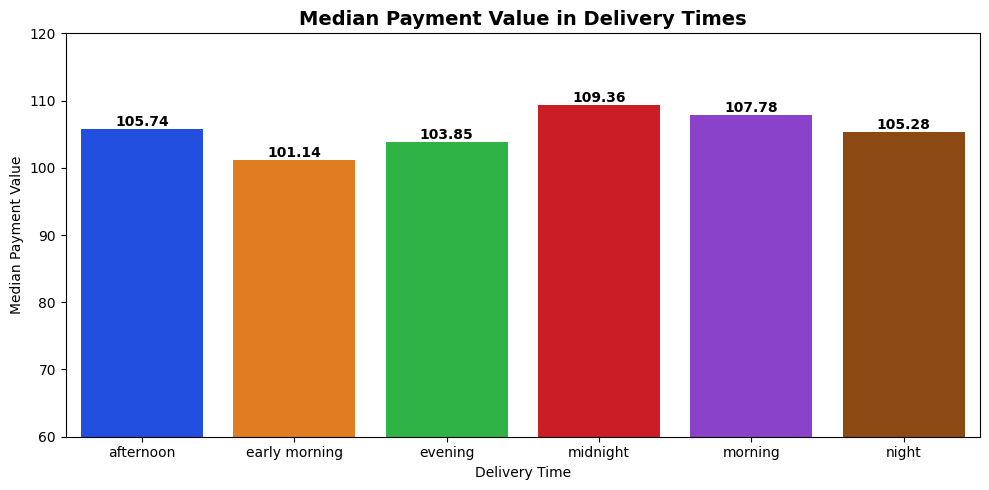

In [266]:
delivery_time_with_payment_value=data.groupby(data['delivered_customer_time'])['payment_value'].median().reset_index()
plt.figure(figsize=(10,5))
ax=sns.barplot(x='delivered_customer_time',y='payment_value',data=delivery_time_with_payment_value,palette='bright')
for container in ax.containers:
    ax.bar_label(container,weight='bold')
plt.xlabel("Delivery Time")
plt.ylim(60,120)
plt.ylabel("Median Payment Value")
plt.title("Median Payment Value in Delivery Times", fontsize=14,weight='bold')
plt.tight_layout()
plt.show()

`Ordes with higher median payment value is delivered at midnight`